# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

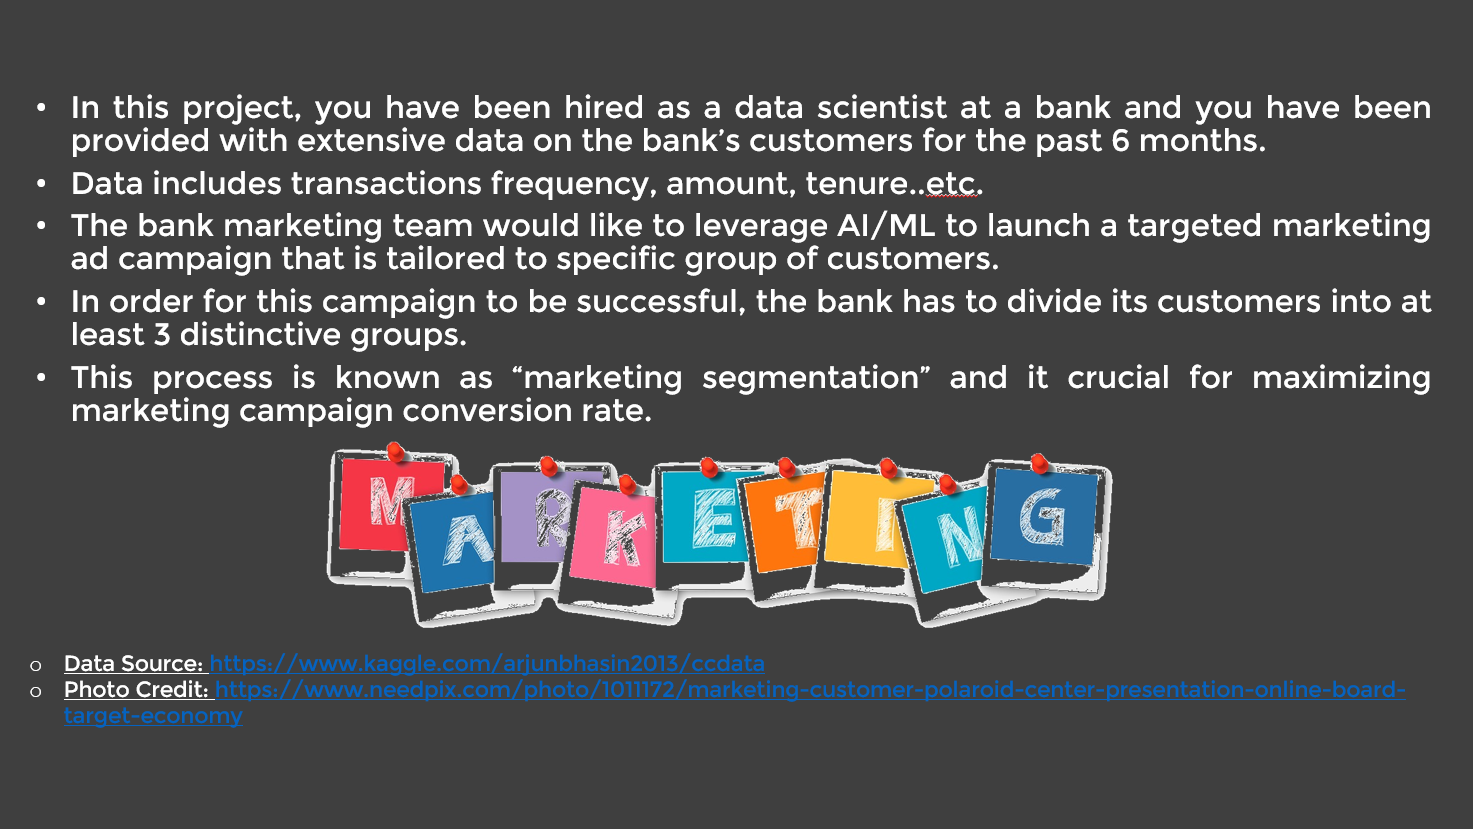

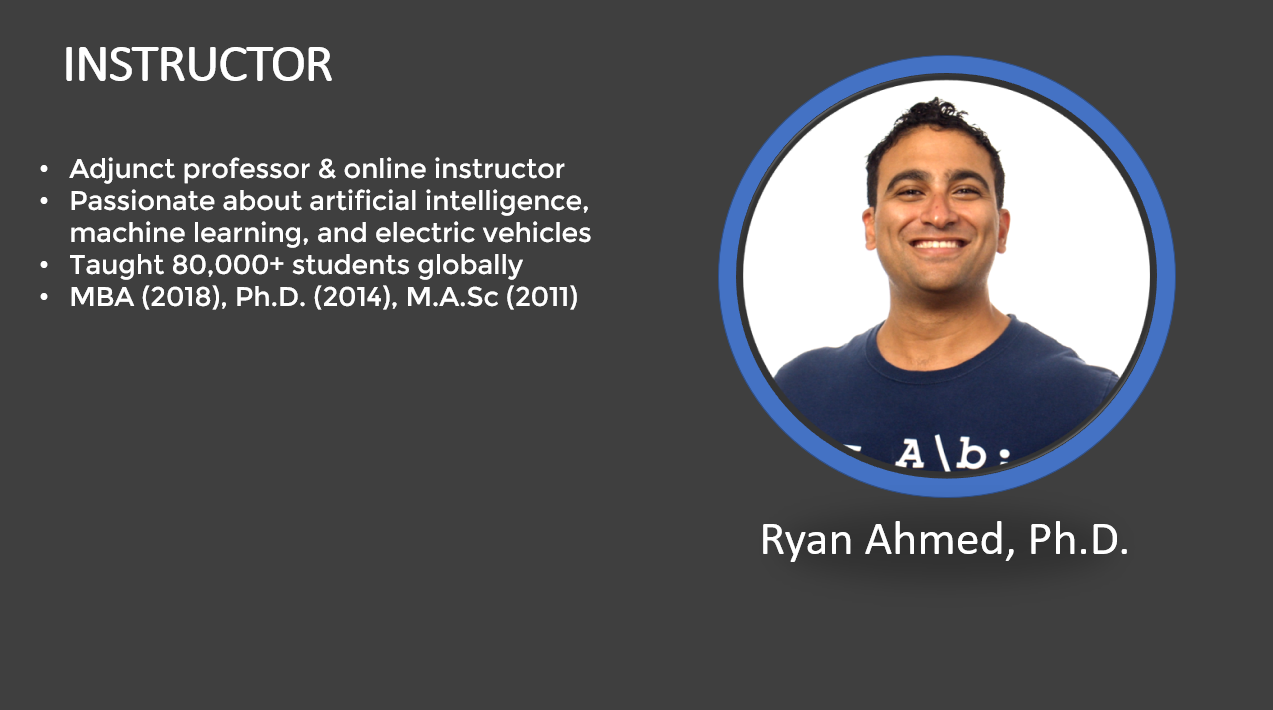

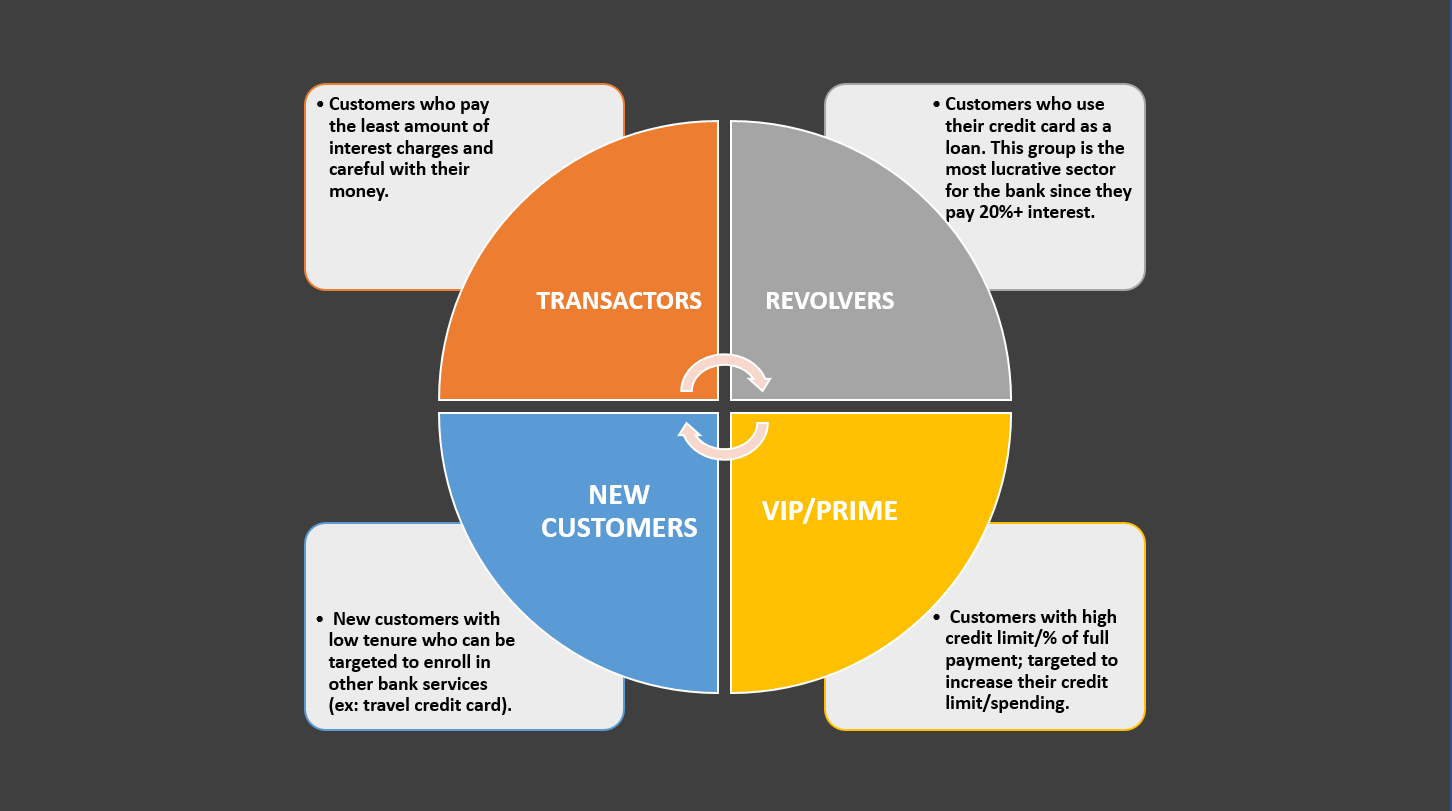

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [2]:
# You have to include the full link to the csv file containing your dataset
creditcard_df = pd.read_csv('Marketing_data.csv')

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [3]:
creditcard_df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ...     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE
0     C10001    40.900749           0.818182      95.40  ...   201.802084        139.509787          0.000000      12
1     C10002  3202.467416           0.909091       0.00  ...  4103.032597       1072.340217          0.222222      12
2     C10003  2495.148862           1.000000     773.17  ...   622.066742        627.284787          0.000000      12
3     C10004  1666.670542           0.636364    1499.00  ...     0.000000               NaN          0.000000      12
4     C10005   817.714335           1.000000      16.00  ...   678.334763        244.791237          0.000000      12
...      ...          ...                ...        ...  ...          ...               ...               ...     ...
8945  C19186    28.493517           1.000000     291.12  ...   325.594462         48.886365          0.500000       6
8946  C19187    19.183215           1.000000     300.00  ...   275.861322               NaN          0.000000       6
8947  C19188    23.398673           0.833333     144.40  ...    81.270775         82.418369          0.250000       6
8948  C19189    13.457564           0.833333       0.00  ...    52.549959         55.755628          0.250000       6
8949  C19190   372.708075           0.666667    1093.25  ...    63.165404         88.288956          0.000000       6

[8950 rows x 18 columns]

In [4]:
# Let's apply info and get additional insights on our dataframe
# 18 features with 8950 points 
# 
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

MINI CHALLENGE #1: 
 - What is the average, minimum and maximum "BALANCE" amount?


In [5]:
print('Average, Max, Min =',creditcard_df['BALANCE'].mean(),creditcard_df['BALANCE'].max(),creditcard_df['BALANCE'].min())

Average, Max, Min = 1564.4748276781006 19043.13856 0.0
Average, Max, Min = 1564.4748276781006 19043.13856 0.0


In [6]:
# Let's apply describe() and get more statistical insights on our dataframe
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

In [7]:
creditcard_df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ...  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE
count   8950.000000        8950.000000   8950.000000  ...       8637.000000       8950.000000  8950.000000
mean    1564.474828           0.877271   1003.204834  ...        864.206542          0.153715    11.517318
std     2081.531879           0.236904   2136.634782  ...       2372.446607          0.292499     1.338331
min        0.000000           0.000000      0.000000  ...          0.019163          0.000000     6.000000
25%      128.281915           0.888889     39.635000  ...        169.123707          0.000000    12.000000
50%      873.385231           1.000000    361.280000  ...        312.343947          0.000000    12.000000
75%     2054.140036           1.000000   1110.130000  ...        825.485459          0.142857    12.000000
max    19043.138560           1.000000  49039.570000  ...      76406.207520          1.000000    12.000000

[8 rows x 17 columns]

MINI CHALLENGE #2: 
- Obtain the features (row) of the customer who made the maximim "ONEOFF_PURCHASES"
- Obtain the features of the customer who made the maximum cash advance transaction? how many cash advance transactions did that customer make? how often did he/she pay their bill?

In [8]:
# Find the customer with the maximum ONEOFF_PURCHASES
max_oneoff_purchase = creditcard_df['ONEOFF_PURCHASES'].max()
customer_max_oneoff_purchase = creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == max_oneoff_purchase]

# Display the features of this customer
customer_max_oneoff_purchase


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ...     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE
550  C10574  11547.52001                1.0   49039.57  ...  46930.59824       2974.069421              0.25      12

[1 rows x 18 columns]

In [9]:
# Find the customer with the maximum CASH_ADVANCE
max_cash_advance = creditcard_df['CASH_ADVANCE'].max()
customer_max_cash_advance = creditcard_df[creditcard_df['CASH_ADVANCE'] == max_cash_advance]

# Display the features of this customer
print("Customer with maximum cash advance transaction:")
print(customer_max_cash_advance)

# Find out how many cash advance transactions this customer made
cash_advance_transactions = customer_max_cash_advance['CASH_ADVANCE_TRX'].values[0]
print(f"Number of cash advance transactions: {cash_advance_transactions}")

# Find out how often this customer paid their bill
bill_payment_frequency = customer_max_cash_advance['BALANCE_FREQUENCY'].values[0]
print(f"Bill payment frequency: {bill_payment_frequency}")


Customer with maximum cash advance transaction:
     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ...     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE
2159  C12226  10905.05381                1.0     431.93  ...  39048.59762       5394.173671               0.0      12

[1 rows x 18 columns]
Number of cash advance transactions: 123
Bill payment frequency: 1.0
Customer with maximum cash advance transaction:
     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ...     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE
2159  C12226  10905.05381                1.0     431.93  ...  39048.59762       5394.173671               0.0      12

[1 rows x 18 columns]
Number of cash advance transactions: 123
Bill payment frequency: 1.0


# TASK #3: VISUALIZE AND EXPLORE DATASET

<Axes: >

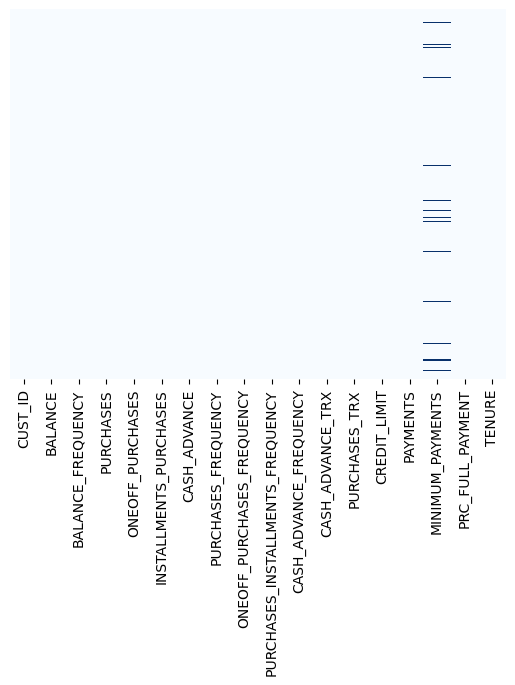

In [10]:
# Let's see if we have any missing data, luckily we don't have many!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [11]:
# We have some missing in MINIMUM_PAYMENT, let's check 
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

MINI CHALLENGE #3: 
 - Fill out missing elements in the "CREDIT_LIMIT" column
 - Double check and make sure that no missing elements are present

In [13]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [14]:
# Double check and make sure that no missing elements are present
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

MINI CHALLENGE #4: 
- Drop Customer ID column 'CUST_ID' and make sure that the column has been removed from the dataframe

In [16]:
# Drop Customer ID column 'CUST_ID
creditcard_df = creditcard_df.drop(columns=['CUST_ID'])

In [17]:
# make sure that the column has been removed from the dataframe
creditcard_df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [18]:
n = len(creditcard_df.columns)
n

17

In [19]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

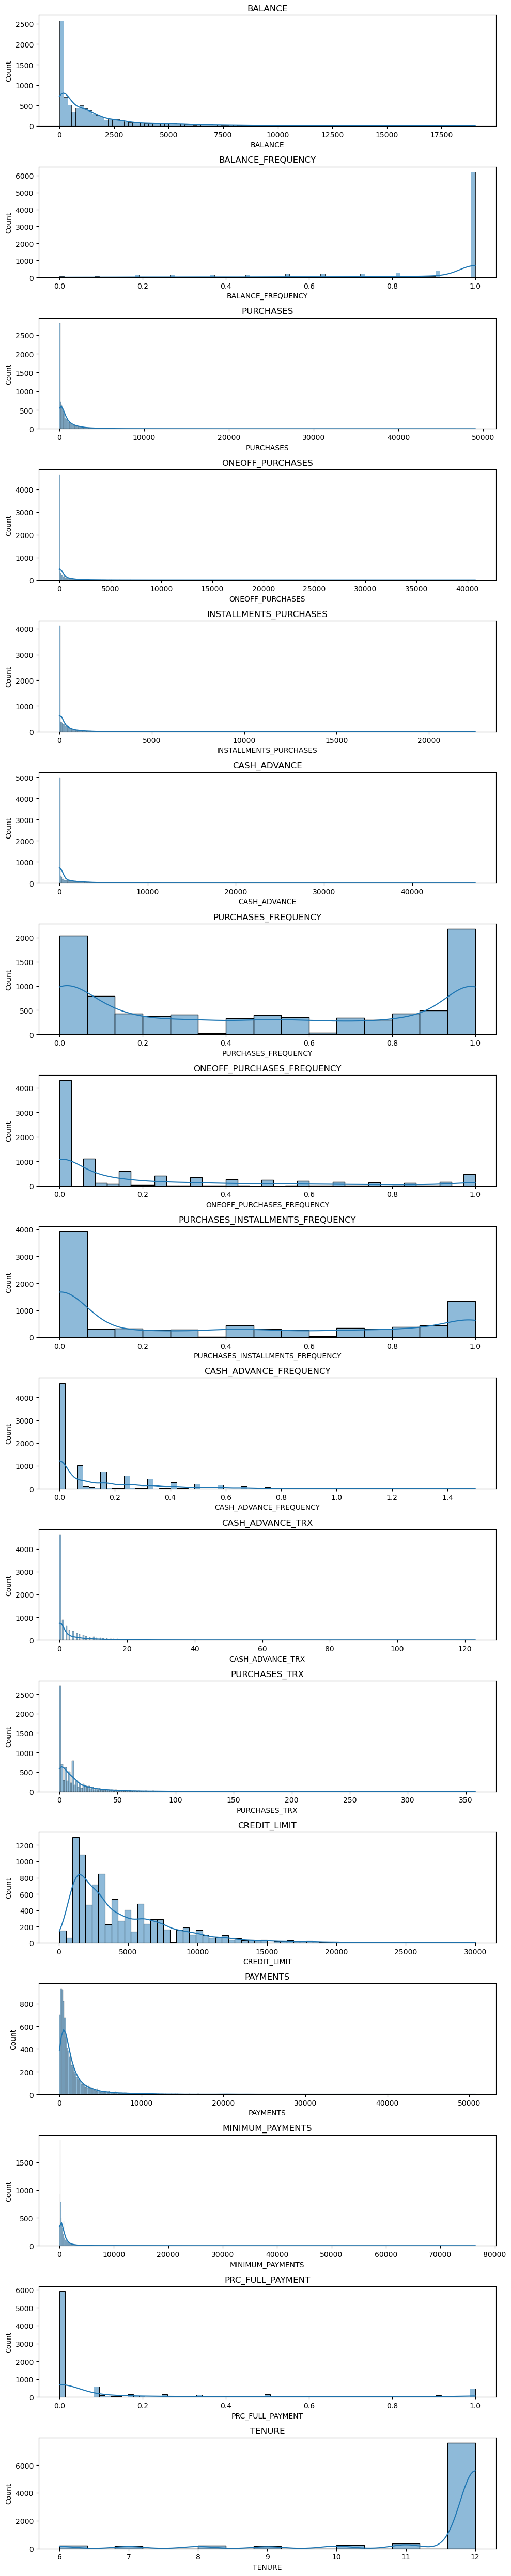

In [20]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
   plt.subplot(17, 1, i+1)
   sns.histplot(creditcard_df[creditcard_df.columns[i]], kde=True)
   #sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
   plt.title(creditcard_df.columns[i])

plt.tight_layout()


# # # # # Set up the matplotlib figure
# # # # plt.figure(figsize=(10, 50))

# # # # # Plot the distribution of each numerical feature with a density line
# # # # for i, column in enumerate(creditcard_df.columns, 1):
# # # #     plt.subplot(len(creditcard_df.columns)//3 + 1, 3, i)
# # # #     sns.histplot(creditcard_df[column], bins=15, kde=True)
# # # #     plt.title(f'{column}')

# # # # plt.tight_layout()
# # # # plt.show()


MINI CHALLENGE #5: 
- Obtain the correlation matrix between features

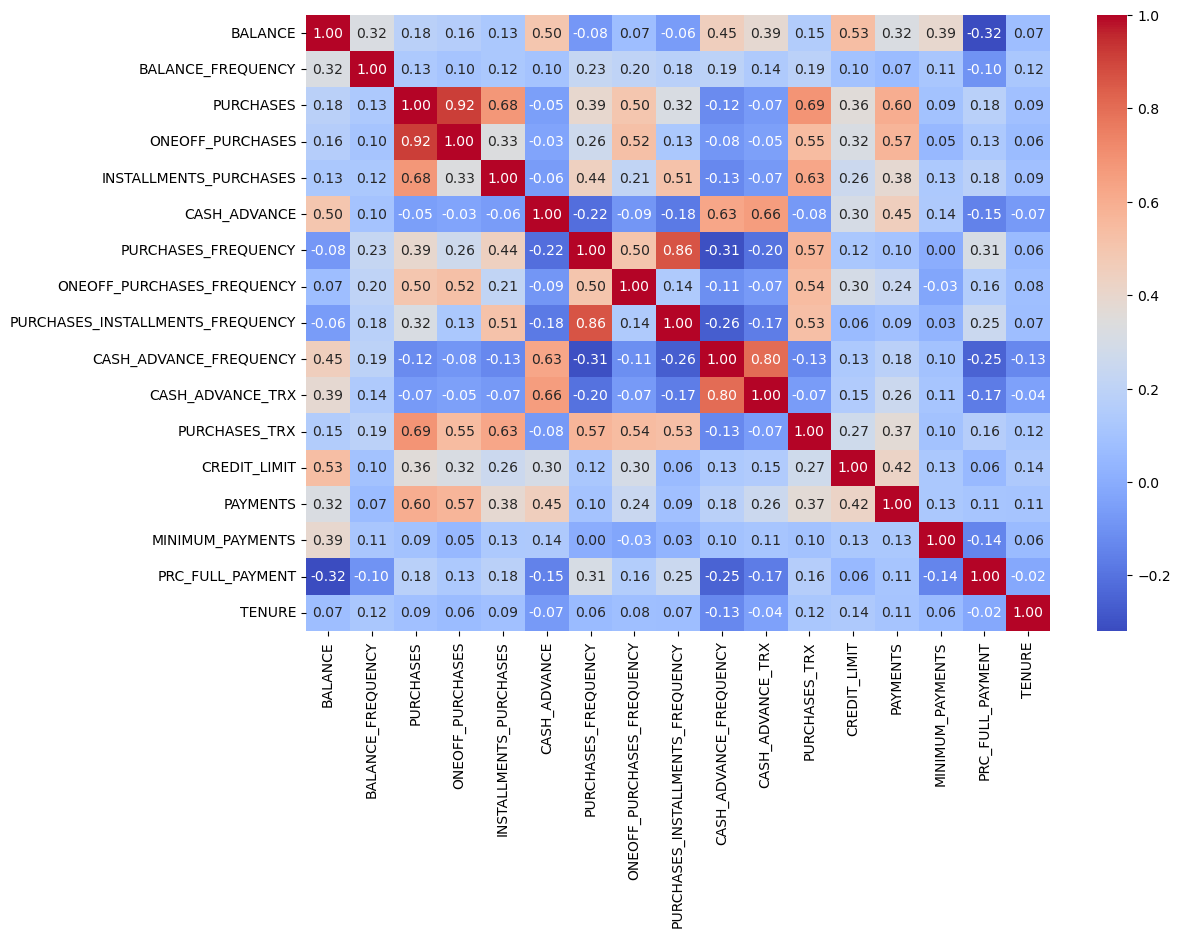

In [21]:
# Obtain the correlation matrix between features
plt.figure(figsize=(12, 8))
sns.heatmap(creditcard_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

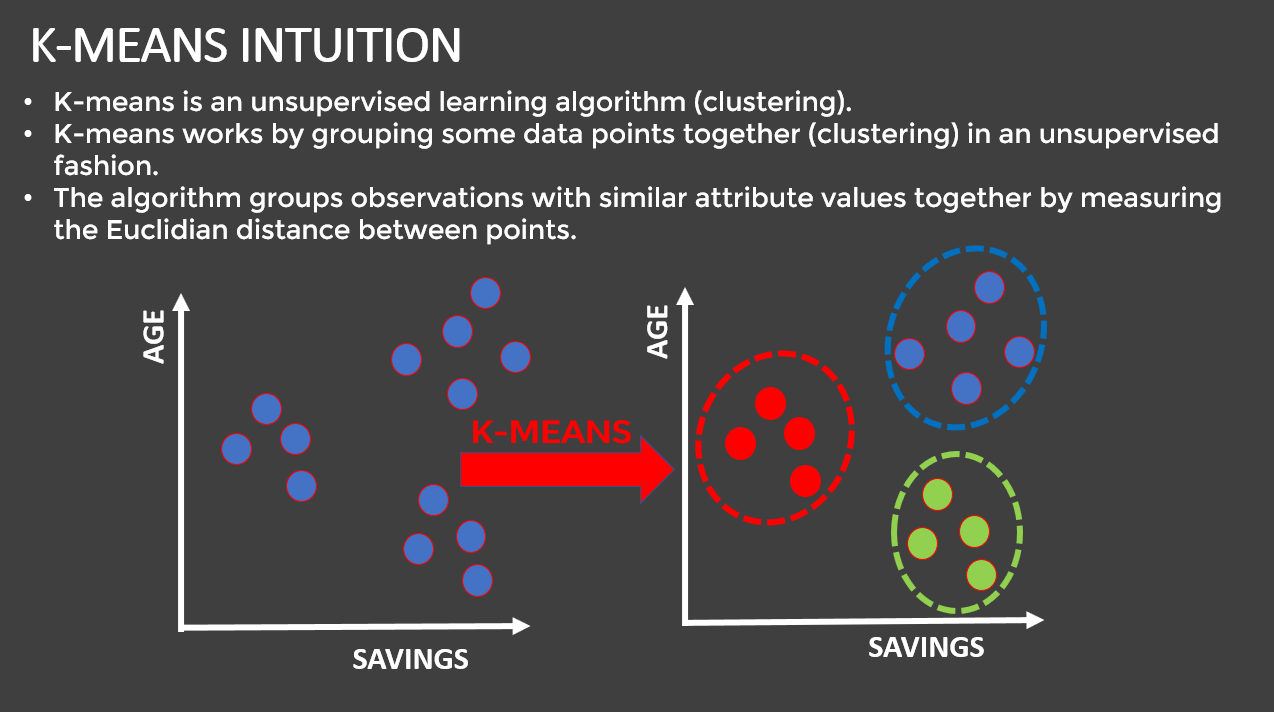

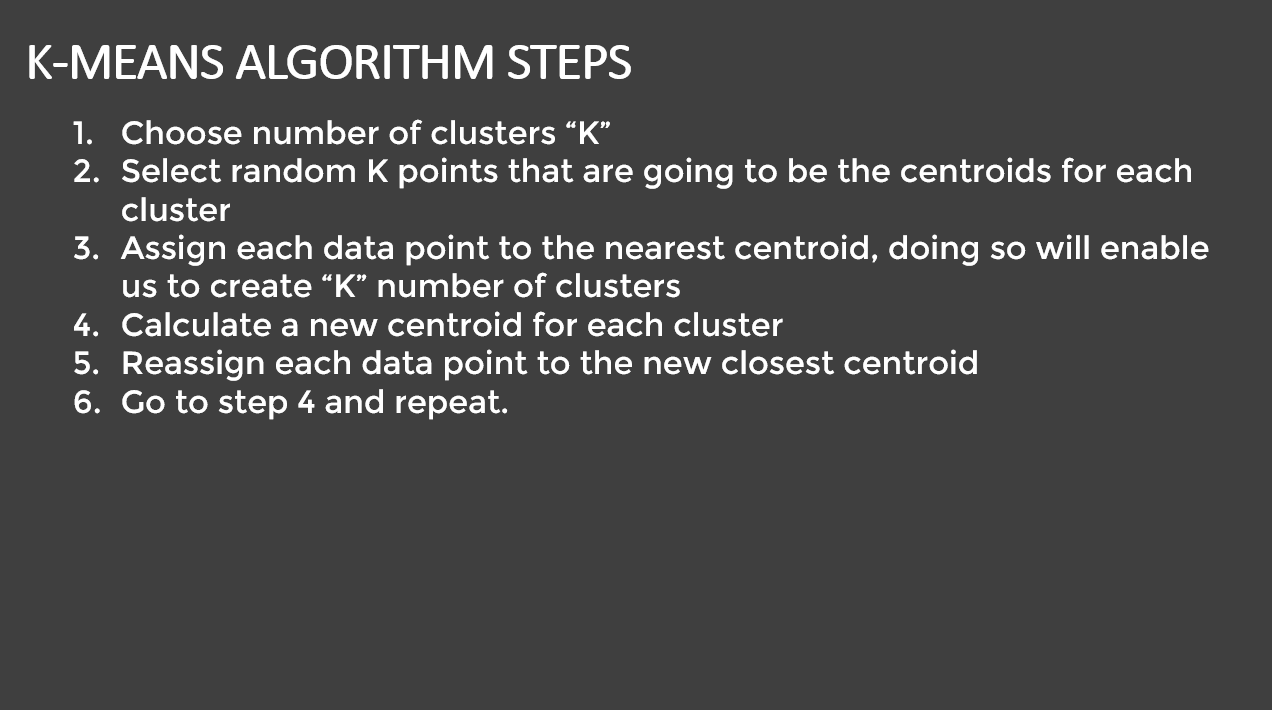

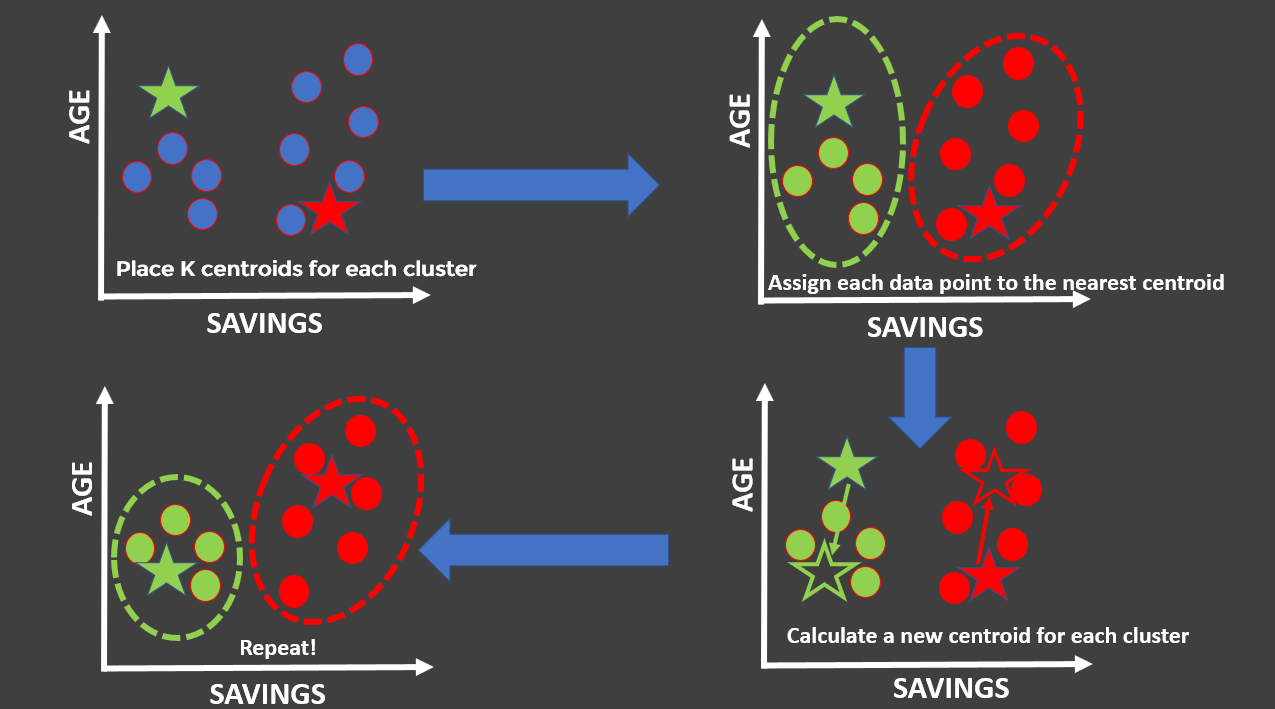

MINI CHALLENGE #6: 
- Which of the following conditions could terminate the K-means clustering algorithm? (choose 2)
    - K-means terminates after a fixed number of iterations is reached  
    - K-means terminates when the number of clusters does not increase between iterations
    - K-means terminates when the centroid locations do not change between iterations

   


# TASK #5: LEARN HOW TO OBTAIN THE OPTIMAL NUMBER OF CLUSTERS (ELBOW METHOD)

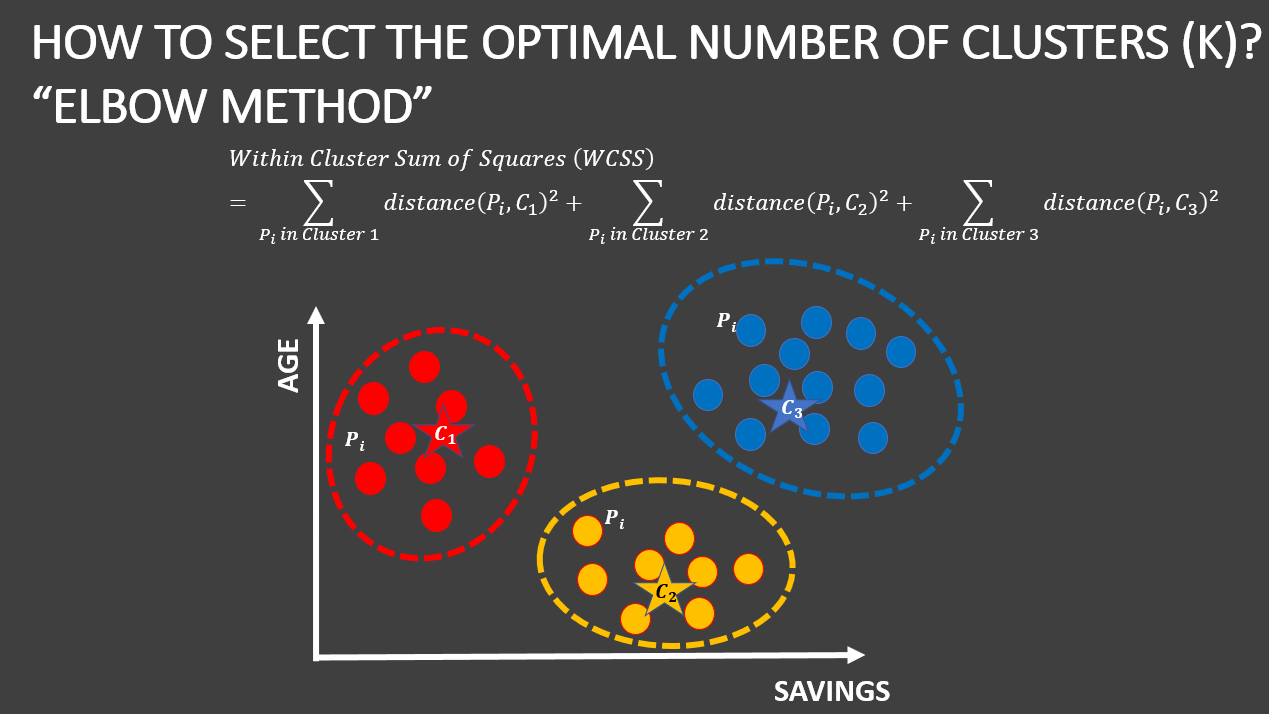

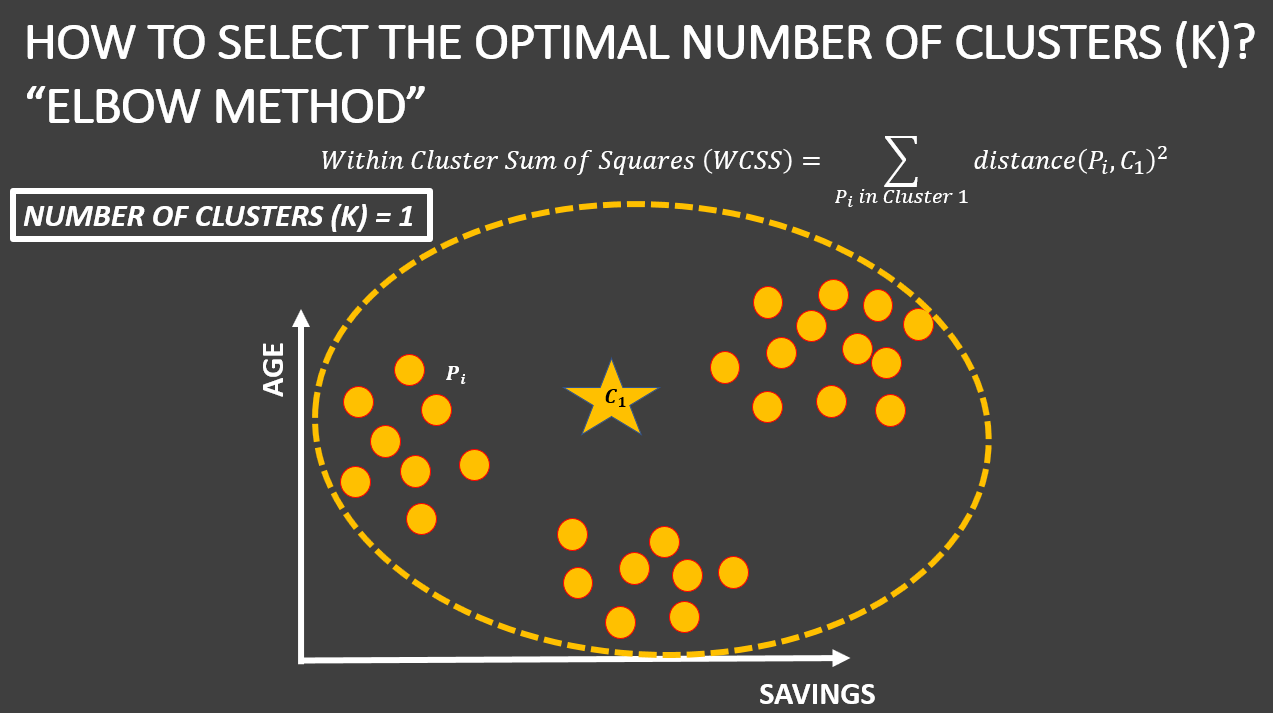

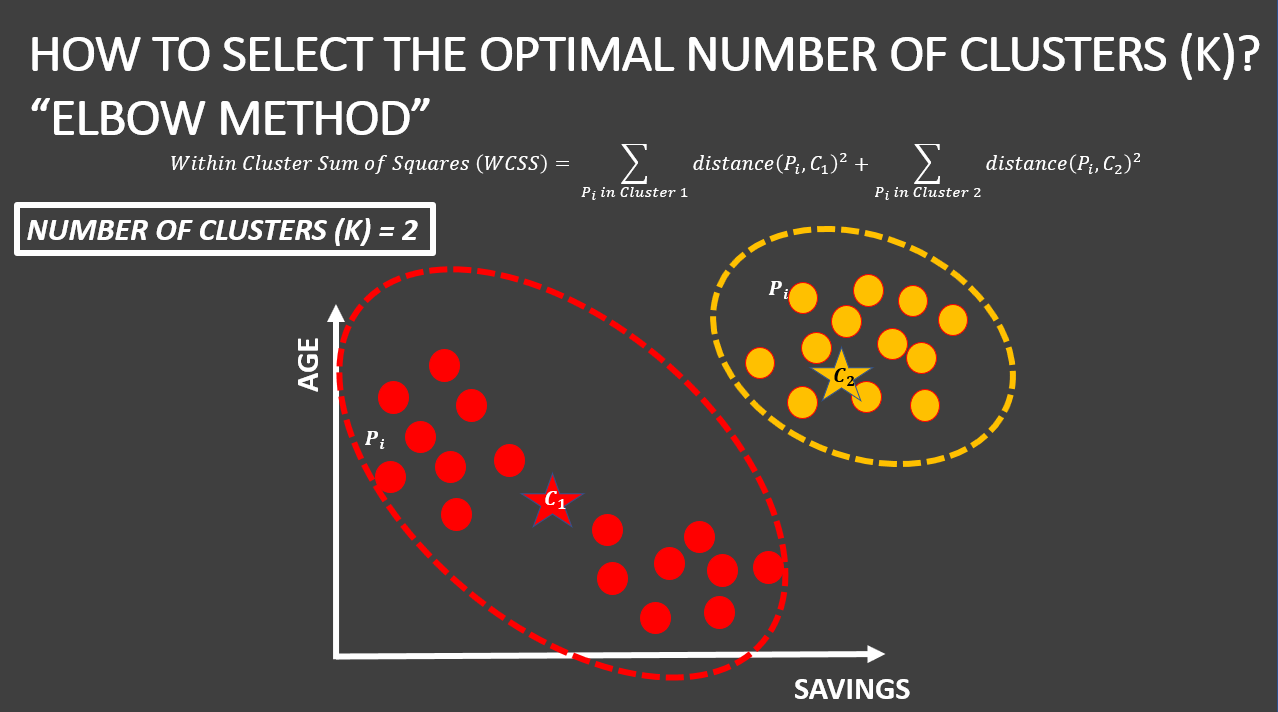

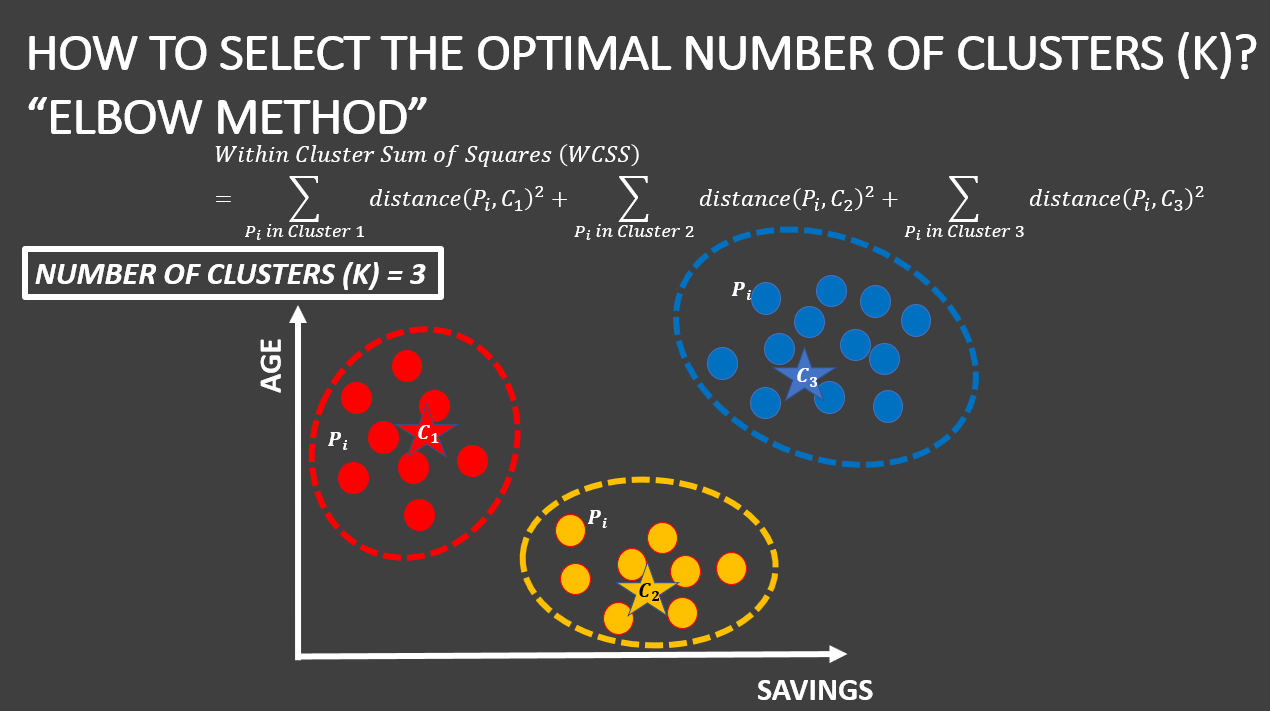

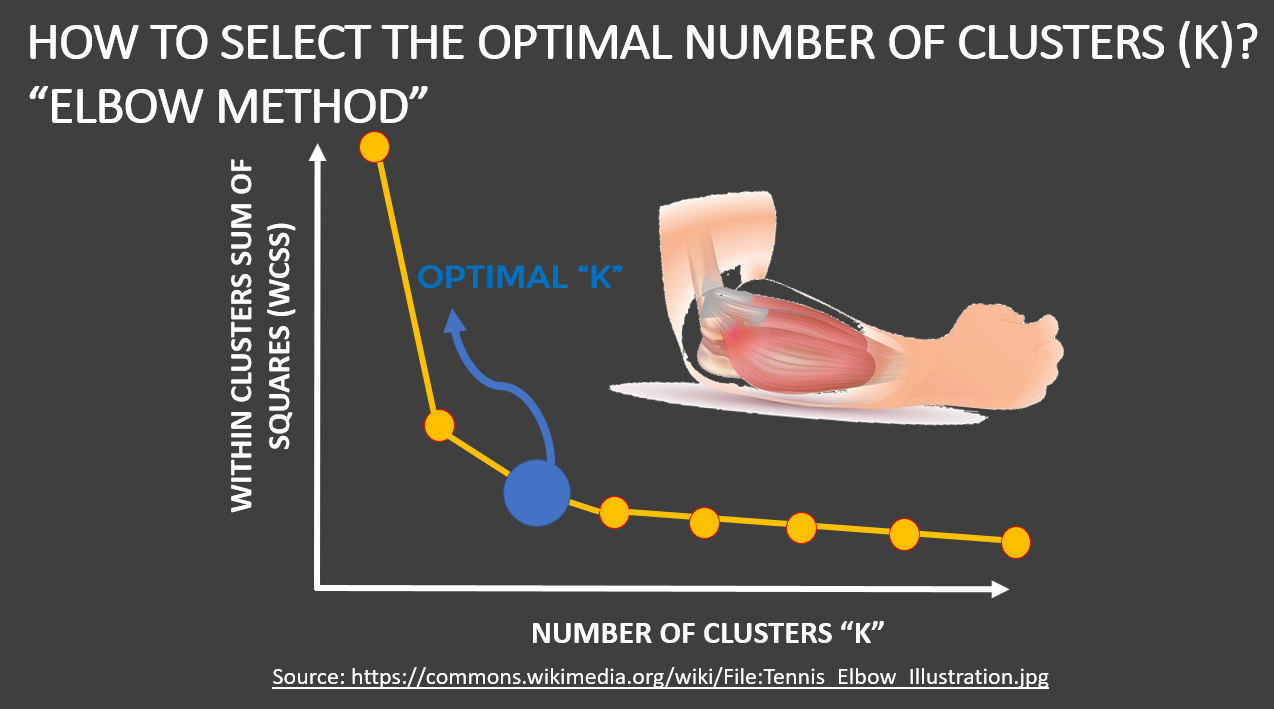

# TASK #6: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [22]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [23]:
creditcard_df_scaled.shape

(8950, 17)

In [24]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755, -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,  0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318, -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,  0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,  0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642, -0.52555097, -4.12276757]])

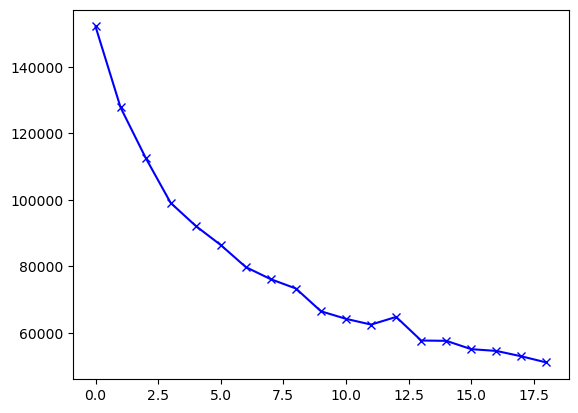

In [25]:
# Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
#       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
#       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
#       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
#       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
#       'TENURE'], dtype='object')


scores = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    scores.append(kmeans.inertia_)

plt.plot(scores,'bx-')

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7 or 8.

MINI CHALLENGE #7:
 - Let's assume that our data only consists of the first 7 columns of "creditcard_df_scaled", what is the optimal number of clusters would be in this case? modify the code and rerun the cells. 

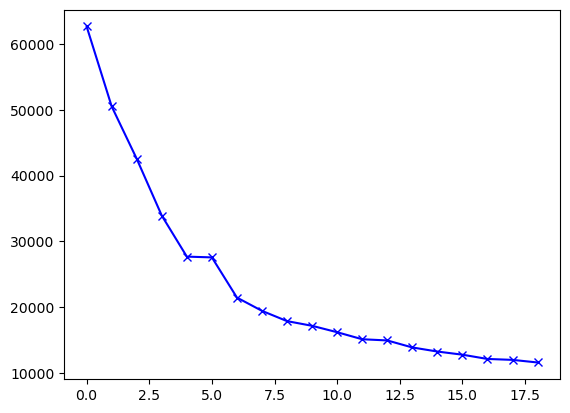

In [26]:
# Let's try with only the first 7 features of data
scores = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled[:,:7])
    scores.append(kmeans.inertia_)

plt.plot(scores,'bx-')

# TASK #7: APPLY K-MEANS METHOD

In [27]:
kmeans = KMeans(7)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [28]:
kmeans.cluster_centers_.shape

(7, 17)

In [29]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  ...  PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE
0 -0.419162          0.136158 -0.070643        -0.245949  ... -0.248311        -0.125346         0.365142  0.250841
1  1.374975          0.413379  7.125811         6.317998  ...  4.938321         0.701412         0.847509  0.333004
2  1.246921          0.470956 -0.023395        -0.231708  ...  0.034919         9.336205        -0.520552  0.295132
3  1.538207          0.401045 -0.238210        -0.172485  ...  0.720327         0.334783        -0.399783  0.083465
4  0.152777          0.433429  0.938819         0.883524  ...  0.389926        -0.042326         0.432952  0.303332
5 -0.354753         -0.461192 -0.287637        -0.208342  ... -0.389866        -0.206853         0.003368 -3.152846
6 -0.221974         -0.286677 -0.334545        -0.219121  ... -0.233985        -0.128687        -0.276811  0.268823

[7 rows x 17 columns]

In [30]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  ...      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE
0   692.025252          0.909525    852.275097       184.212867  ...   1014.309027       572.092884         0.260512  11.853008
1  4426.370260          0.975196  16227.610370     11079.020123  ...  16029.098079      2498.817366         0.401597  11.962963
2  4159.834847          0.988836    953.221228       207.850000  ...   1834.232370     22621.839598         0.001462  11.912281
3  4766.123690          0.972275    494.266125       306.148423  ...   3818.419432      1644.404255         0.036785  11.629017
4  1882.467236          0.979946   3009.005979      2058.905610  ...   2861.942464       765.567974         0.280346  11.923254
5   826.086991          0.768019    388.663333       246.632826  ...    604.518815       382.144559         0.154700   7.298003
6  1102.455477          0.809360    288.443934       228.741804  ...   1055.779694       564.306015         0.072752  11.877072

[7 rows x 17 columns]

In [31]:
labels.shape # Labels associated to each data point

(8950,)

In [32]:
labels.max()

6

In [33]:
labels.min()

0

In [34]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans


array([0, 5, 1, ..., 3, 0, 0], dtype=int32)

In [35]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  ...  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster
0    40.900749           0.818182      95.40              0.00  ...        139.509787          0.000000      12        6
1  3202.467416           0.909091       0.00              0.00  ...       1072.340217          0.222222      12        3
2  2495.148862           1.000000     773.17            773.17  ...        627.284787          0.000000      12        4
3  1666.670542           0.636364    1499.00           1499.00  ...        864.206542          0.000000      12        6
4   817.714335           1.000000      16.00             16.00  ...        244.791237          0.000000      12        6

[5 rows x 18 columns]

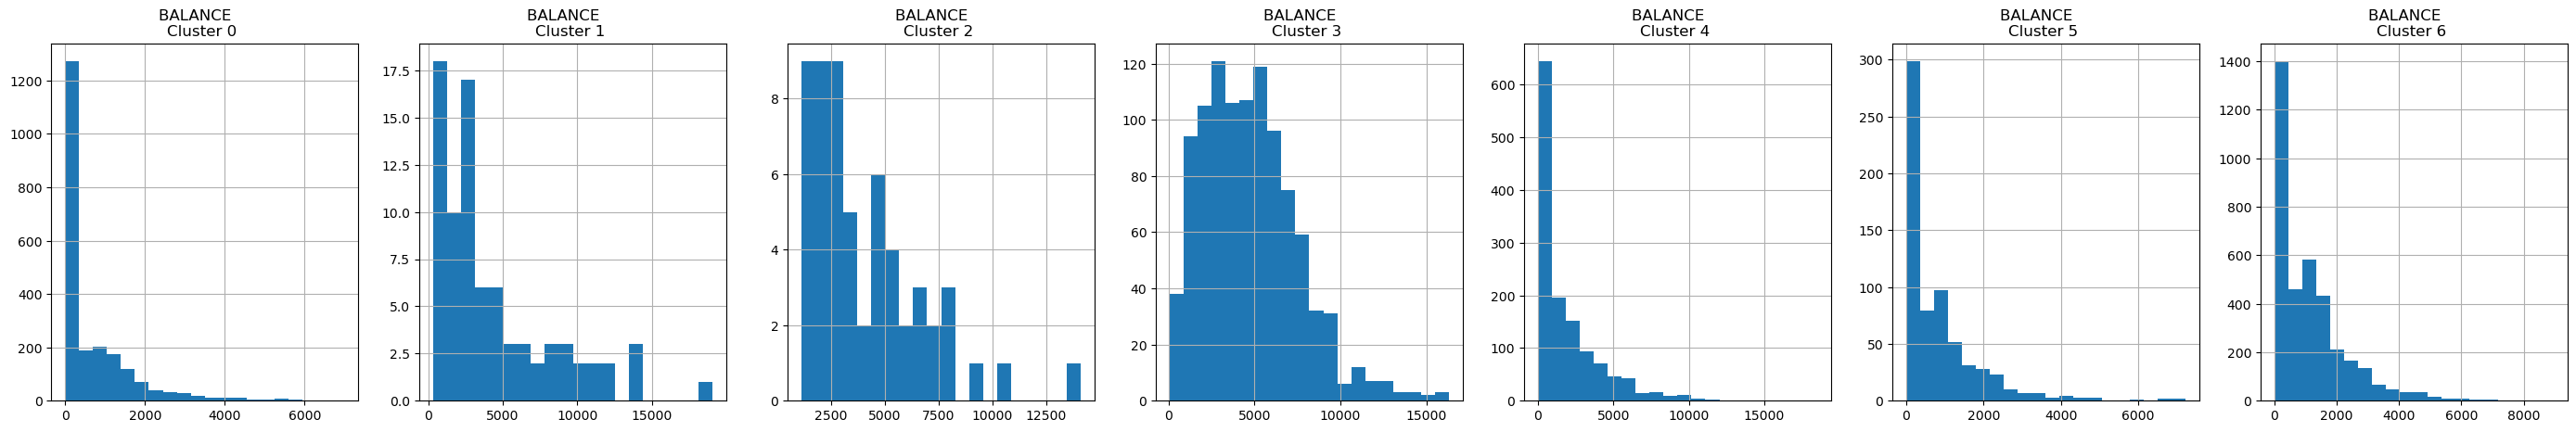

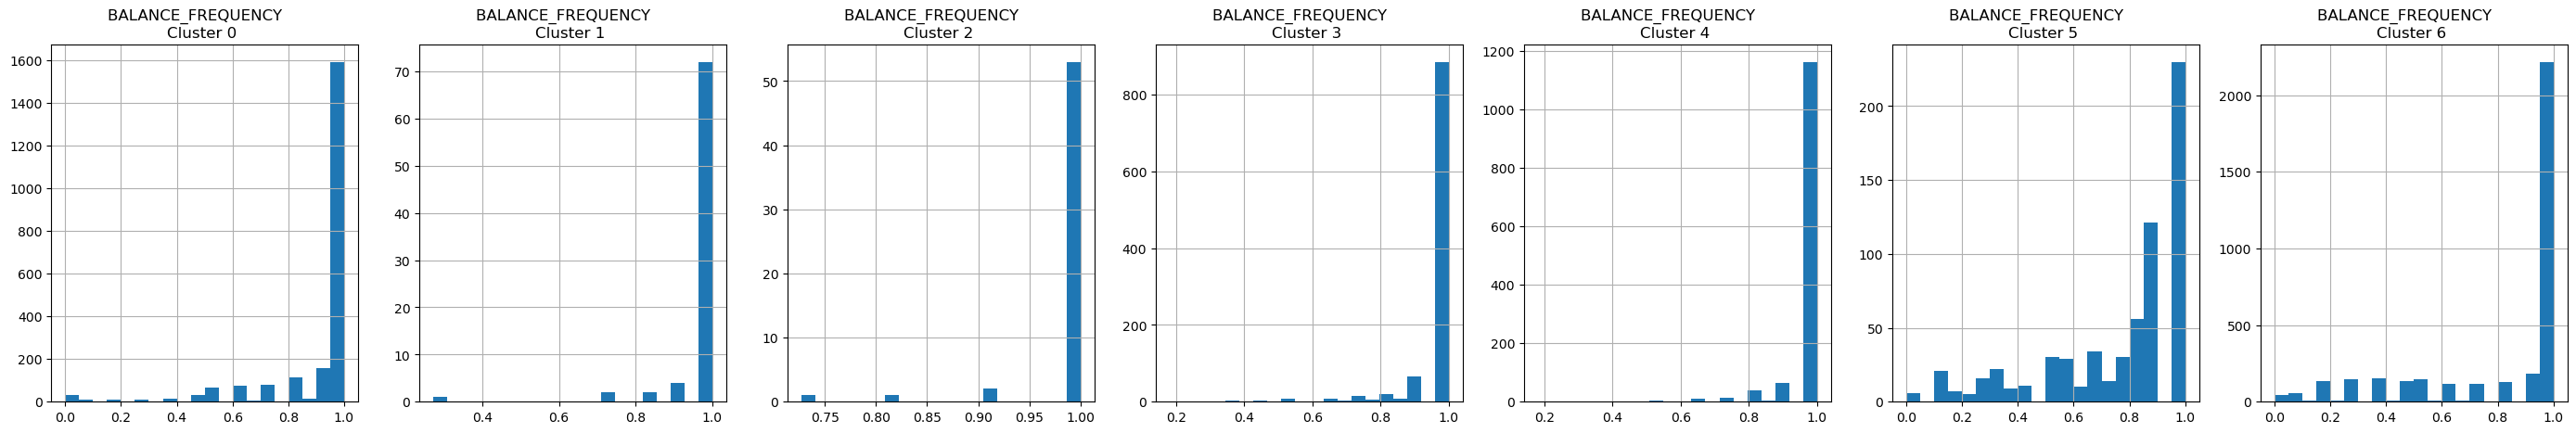

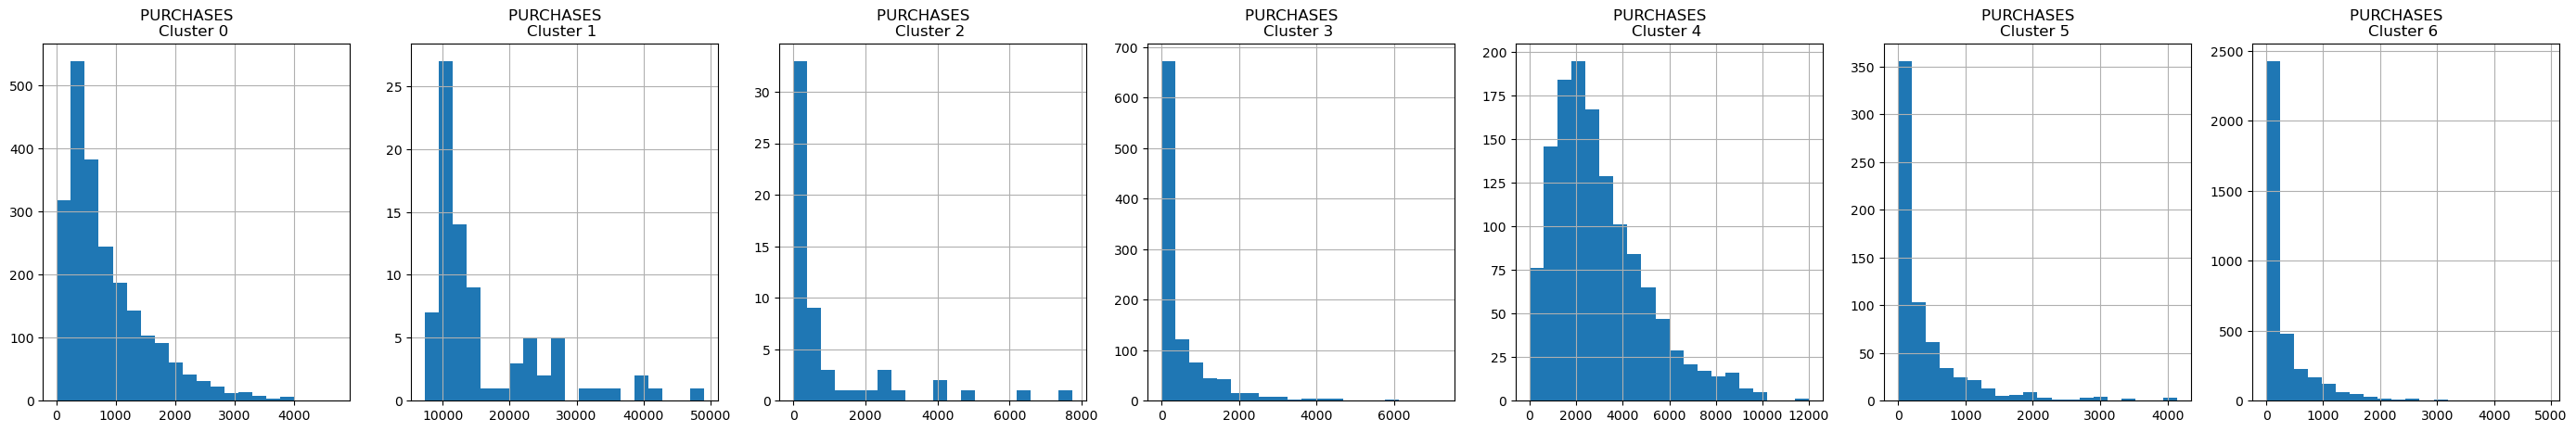

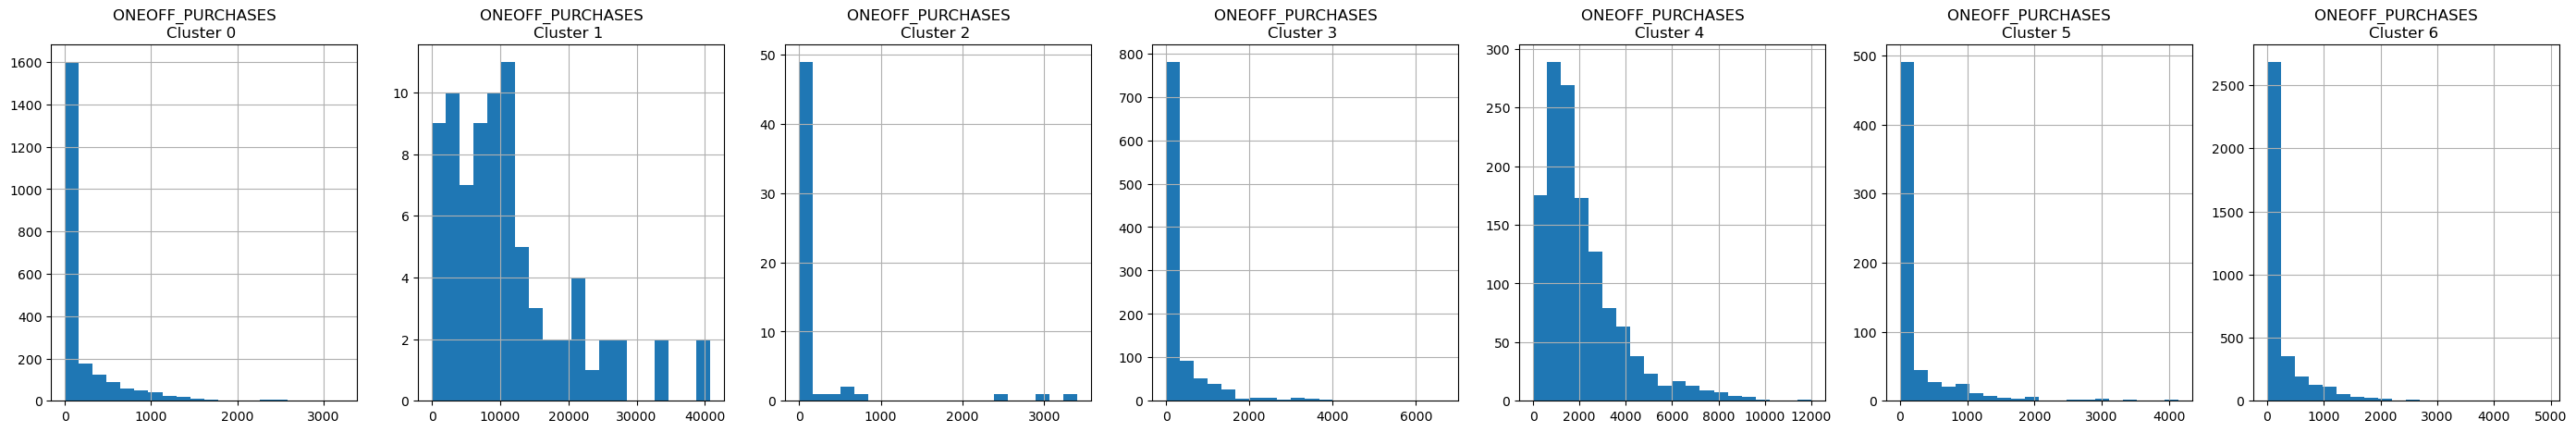

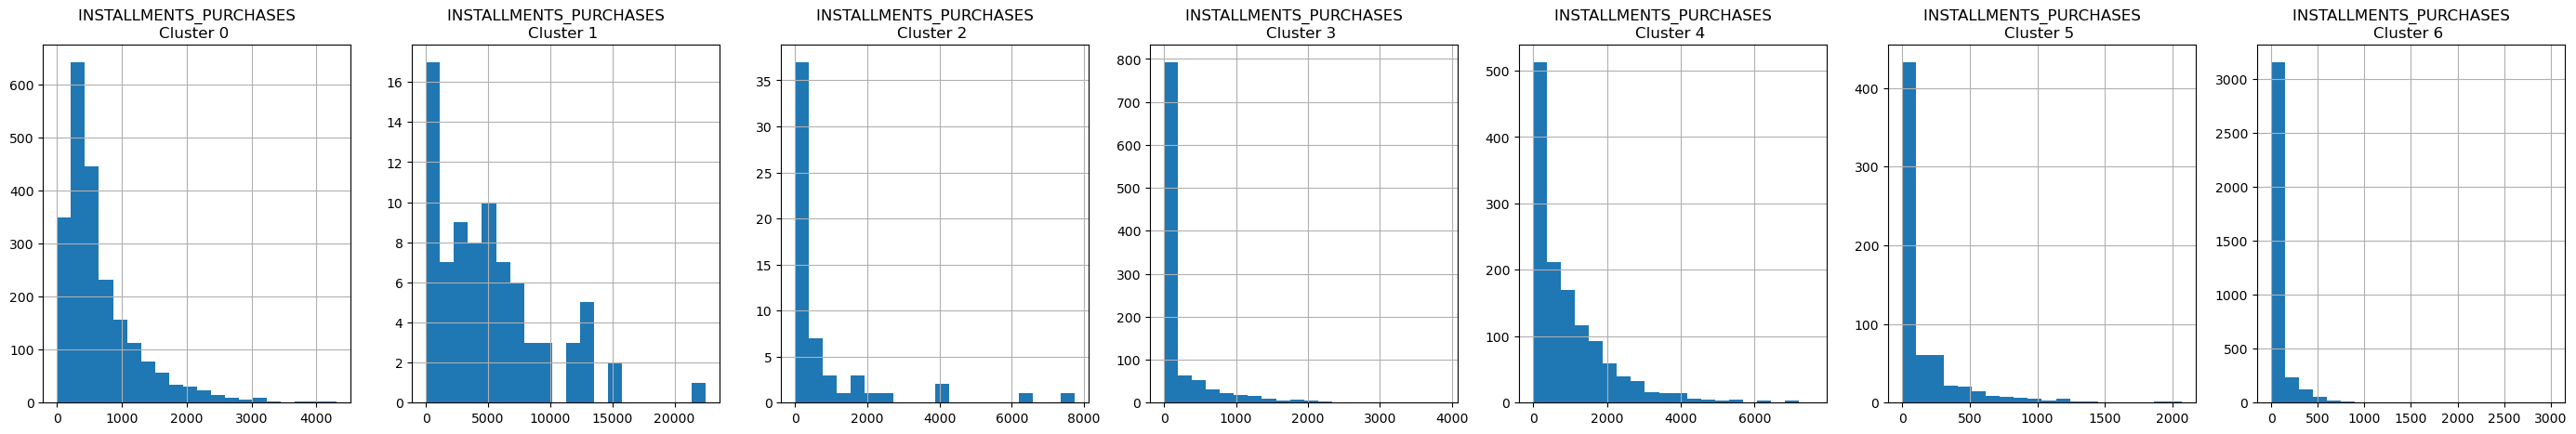

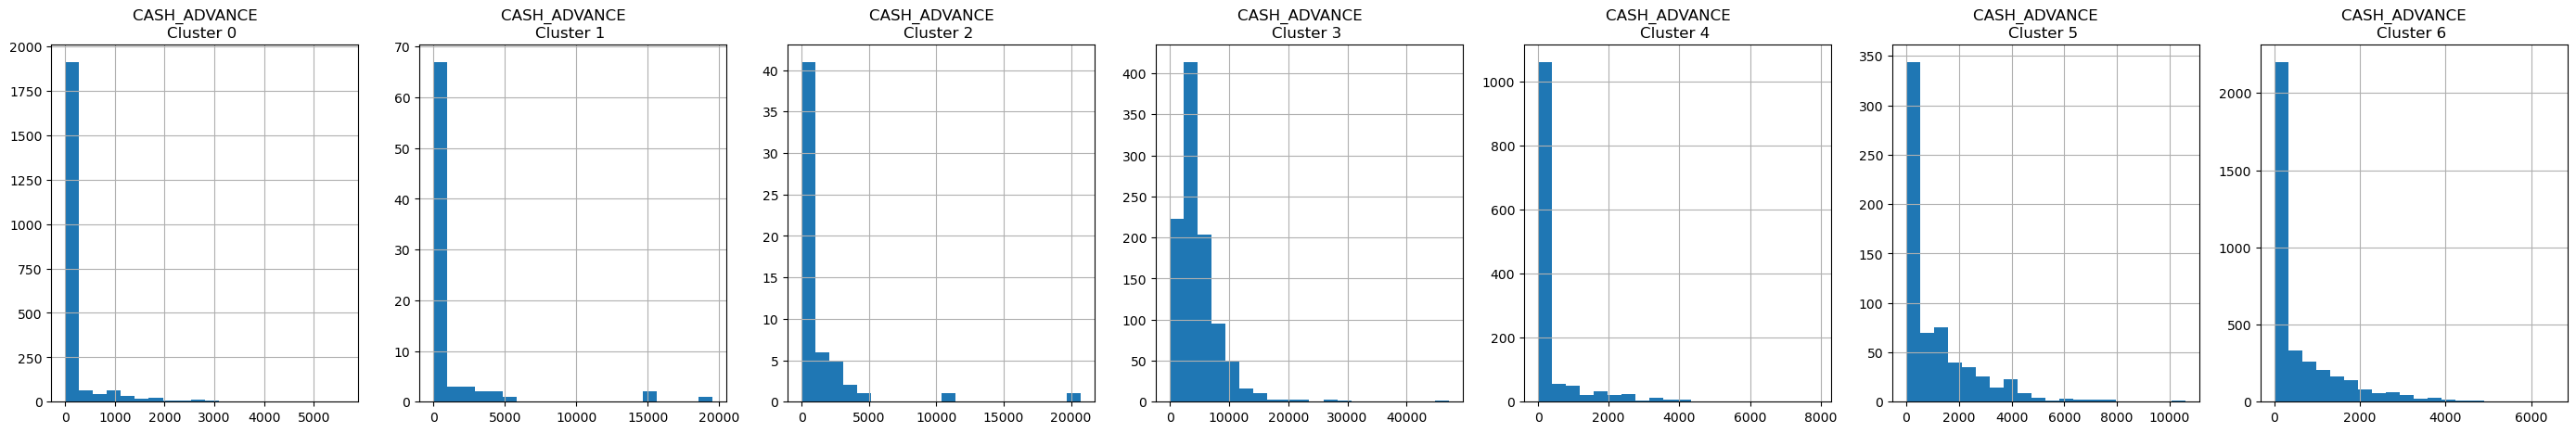

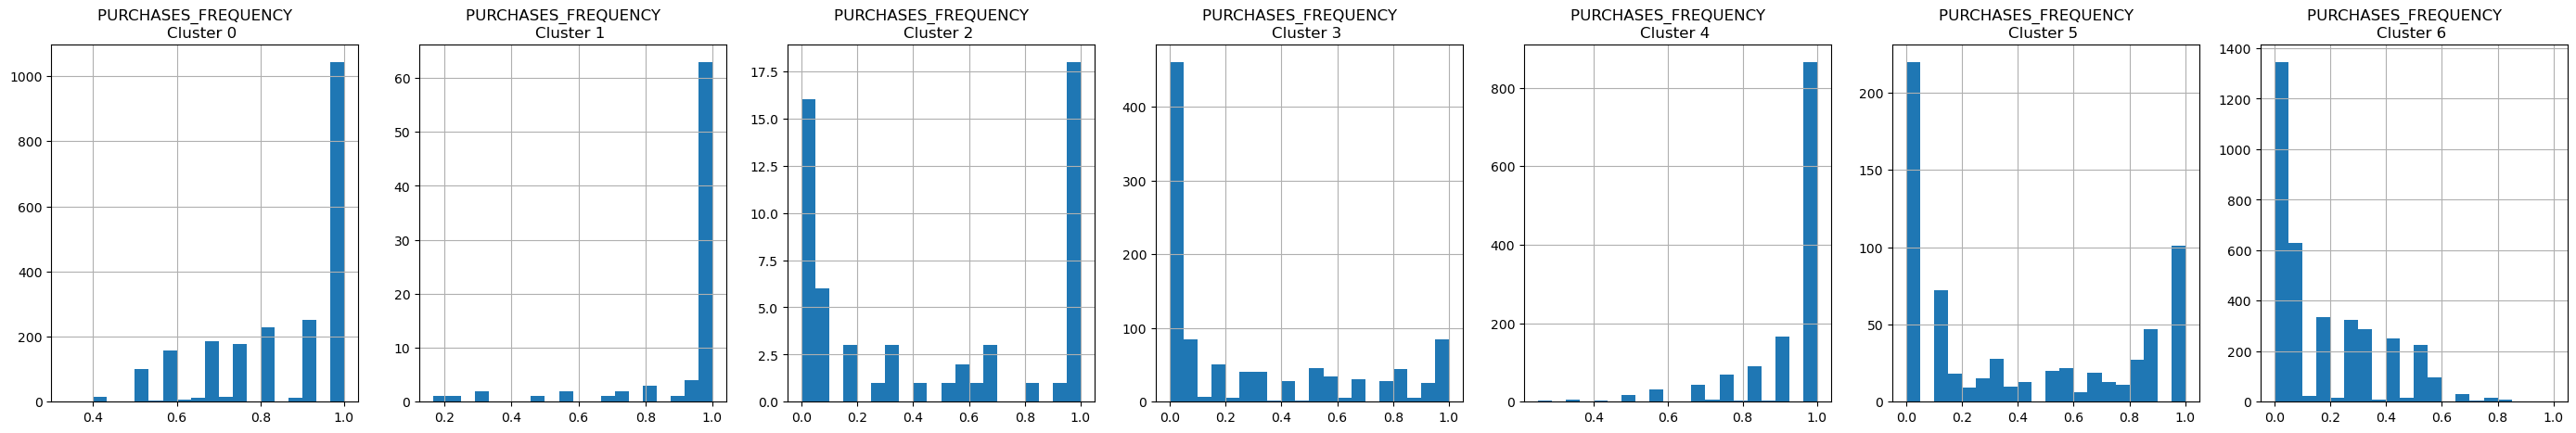

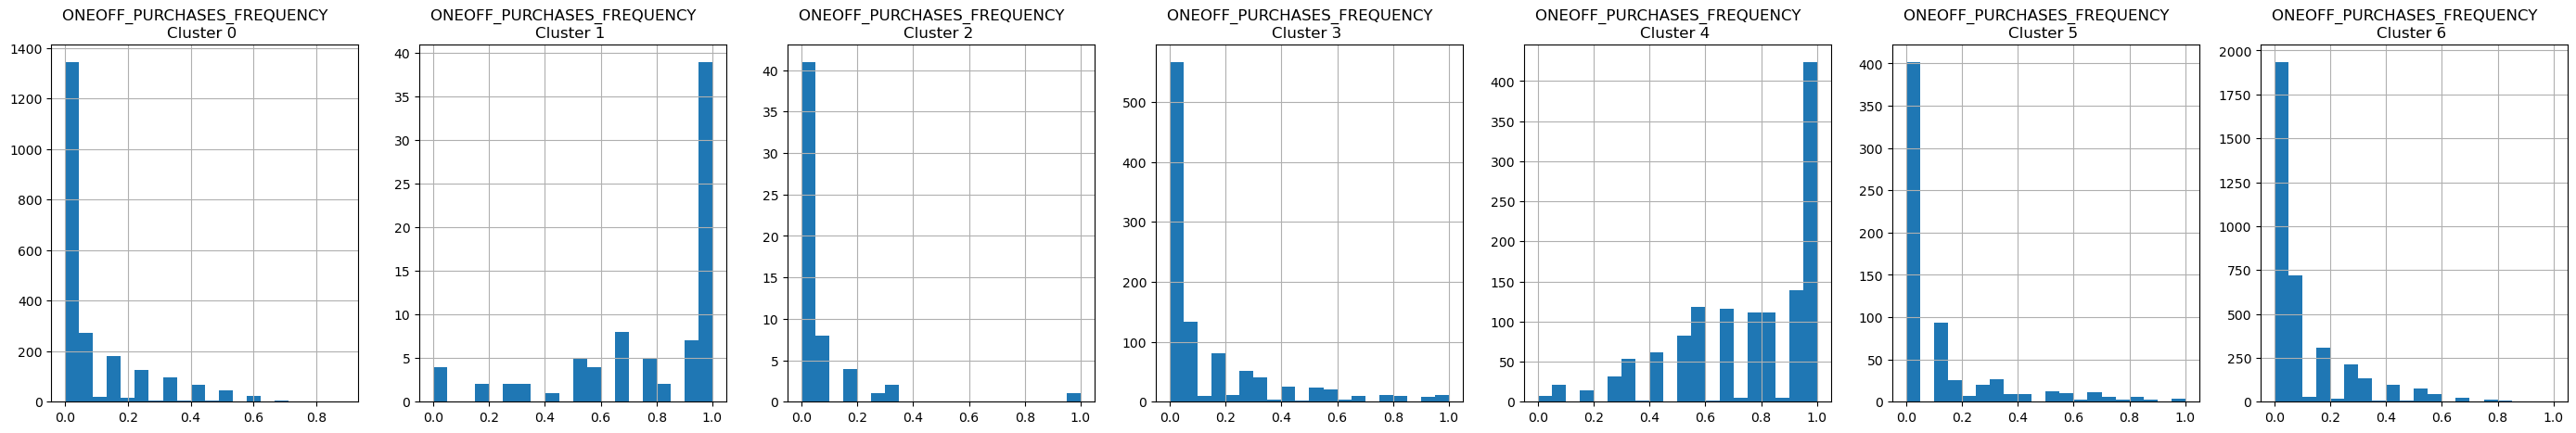

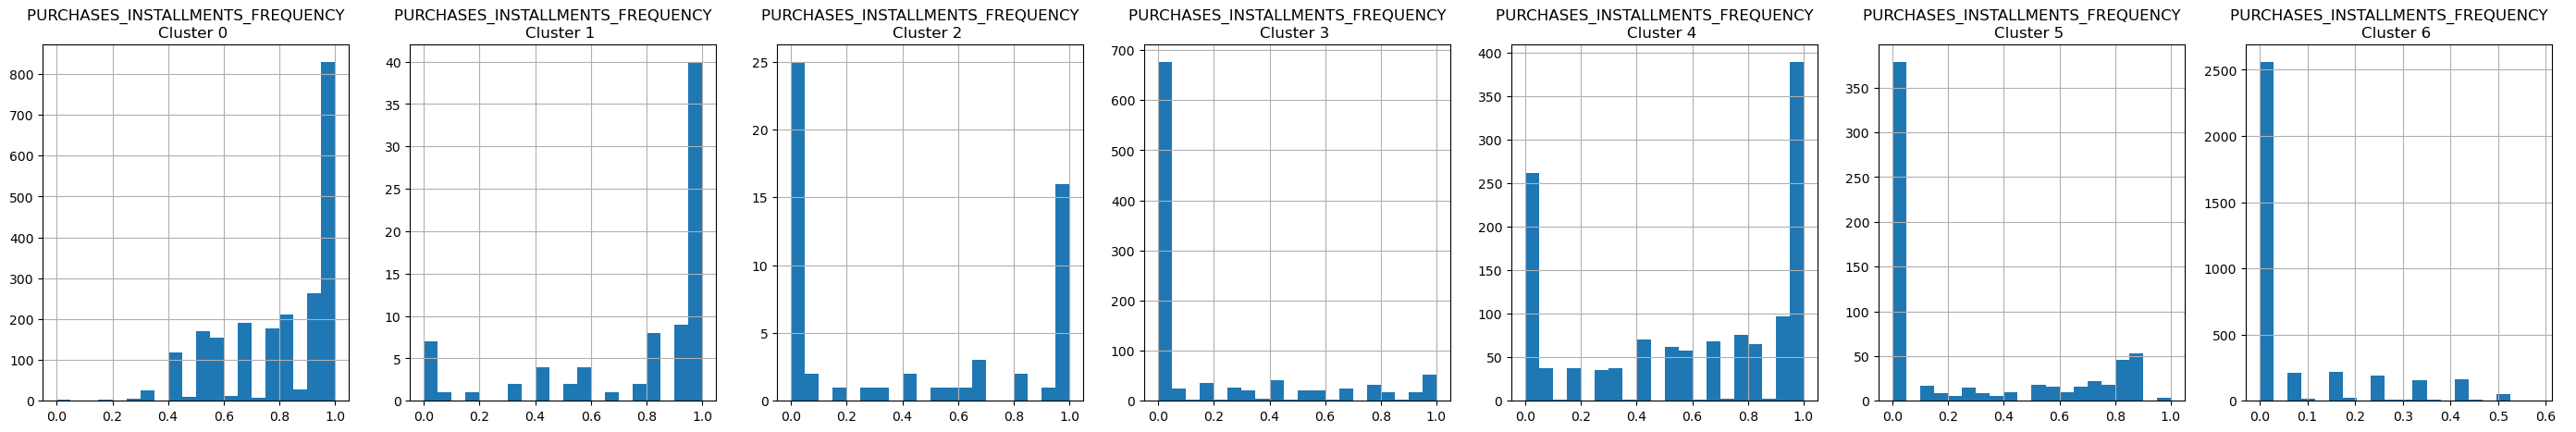

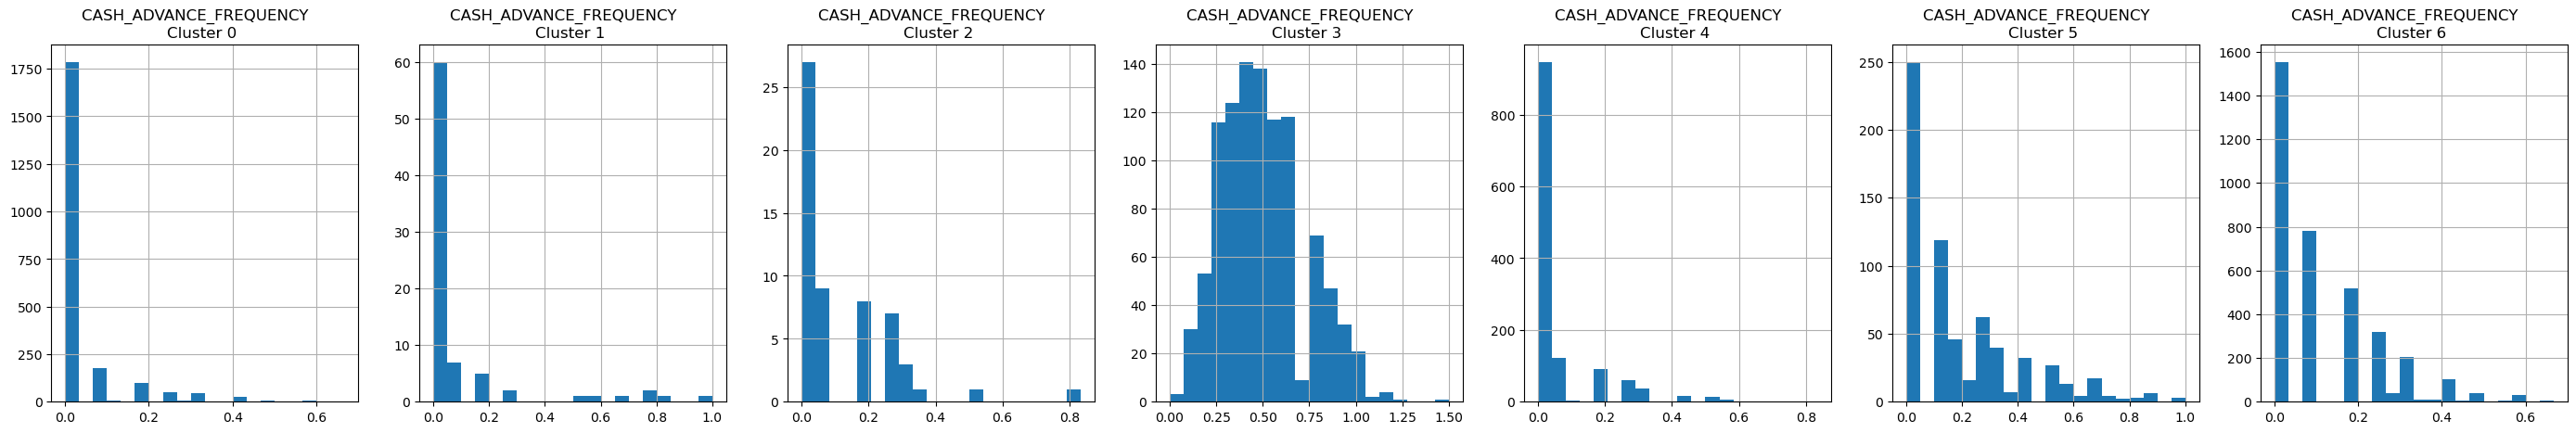

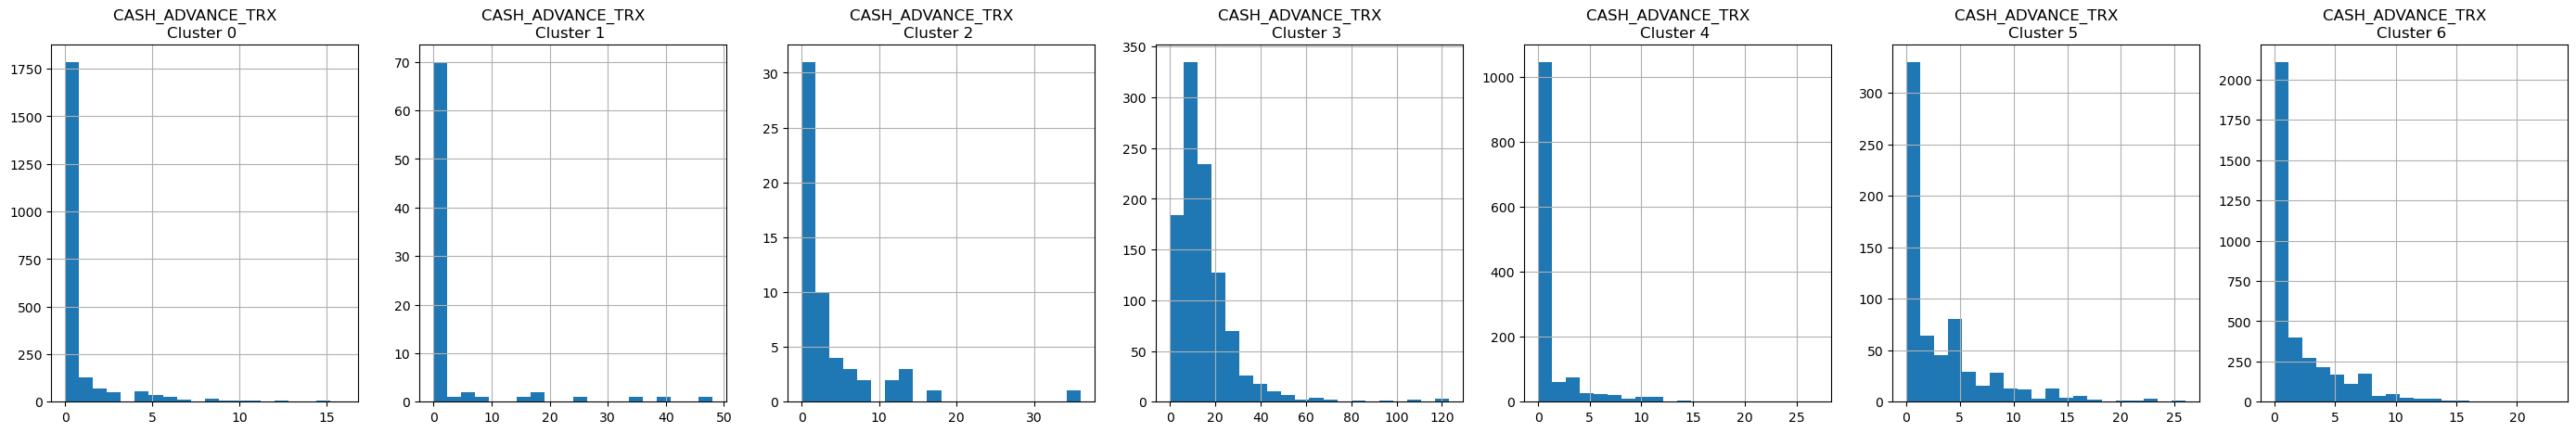

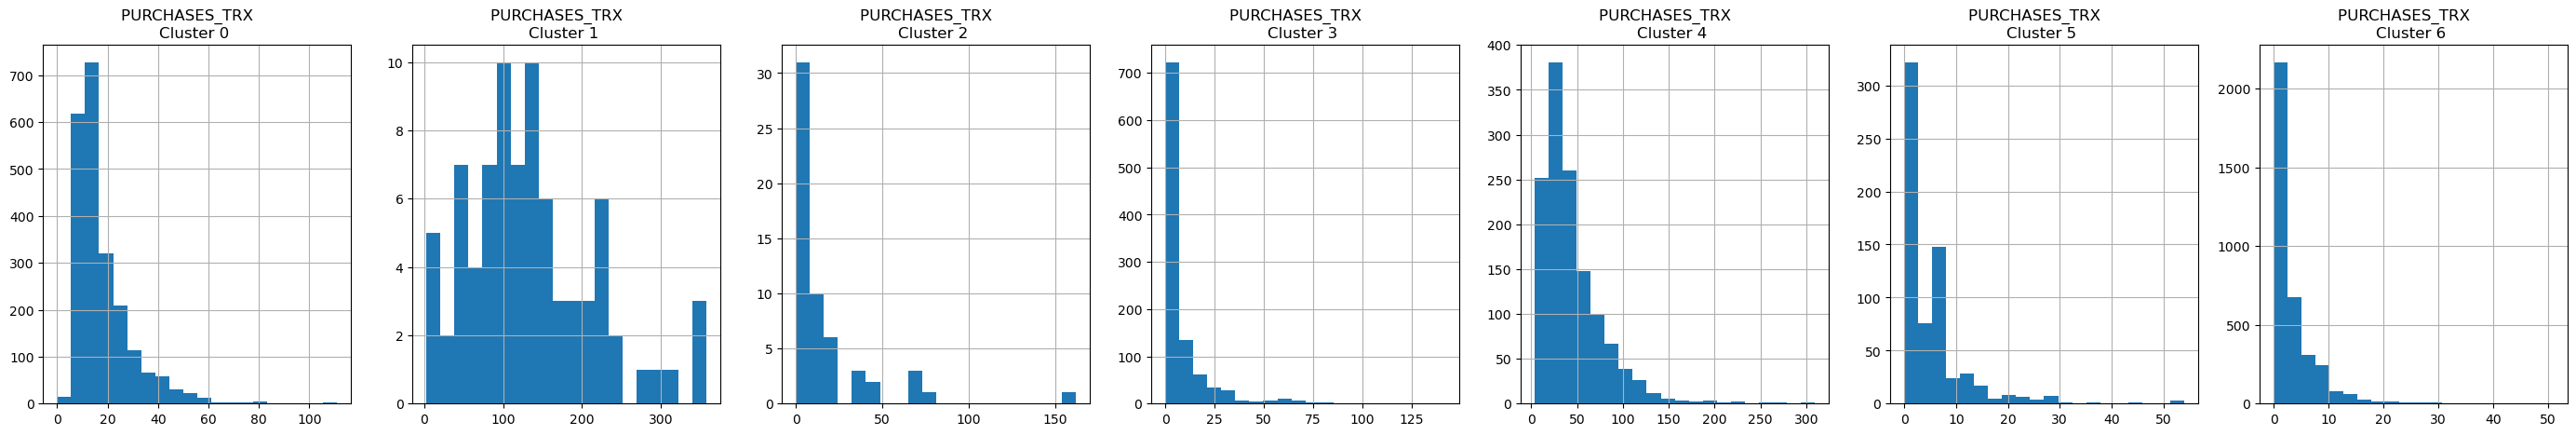

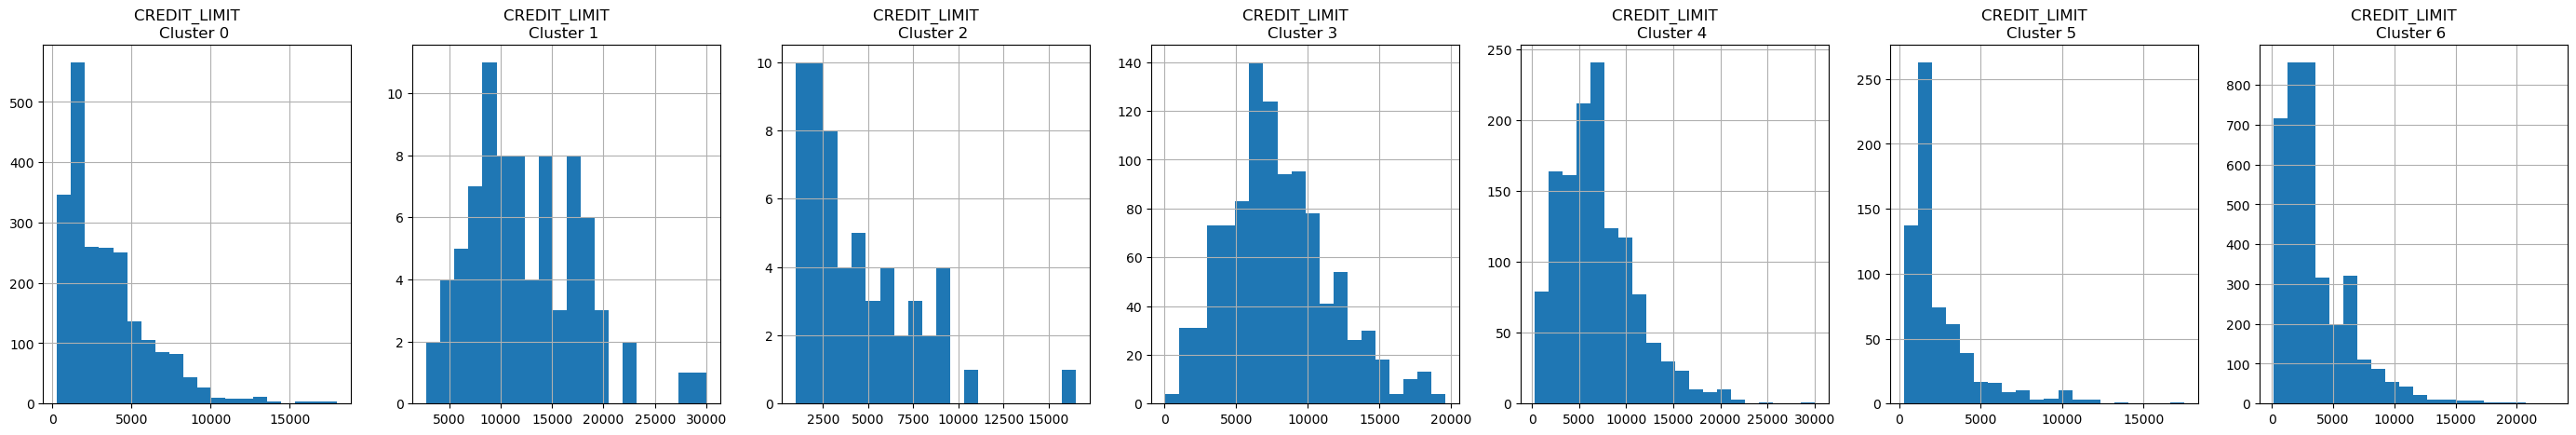

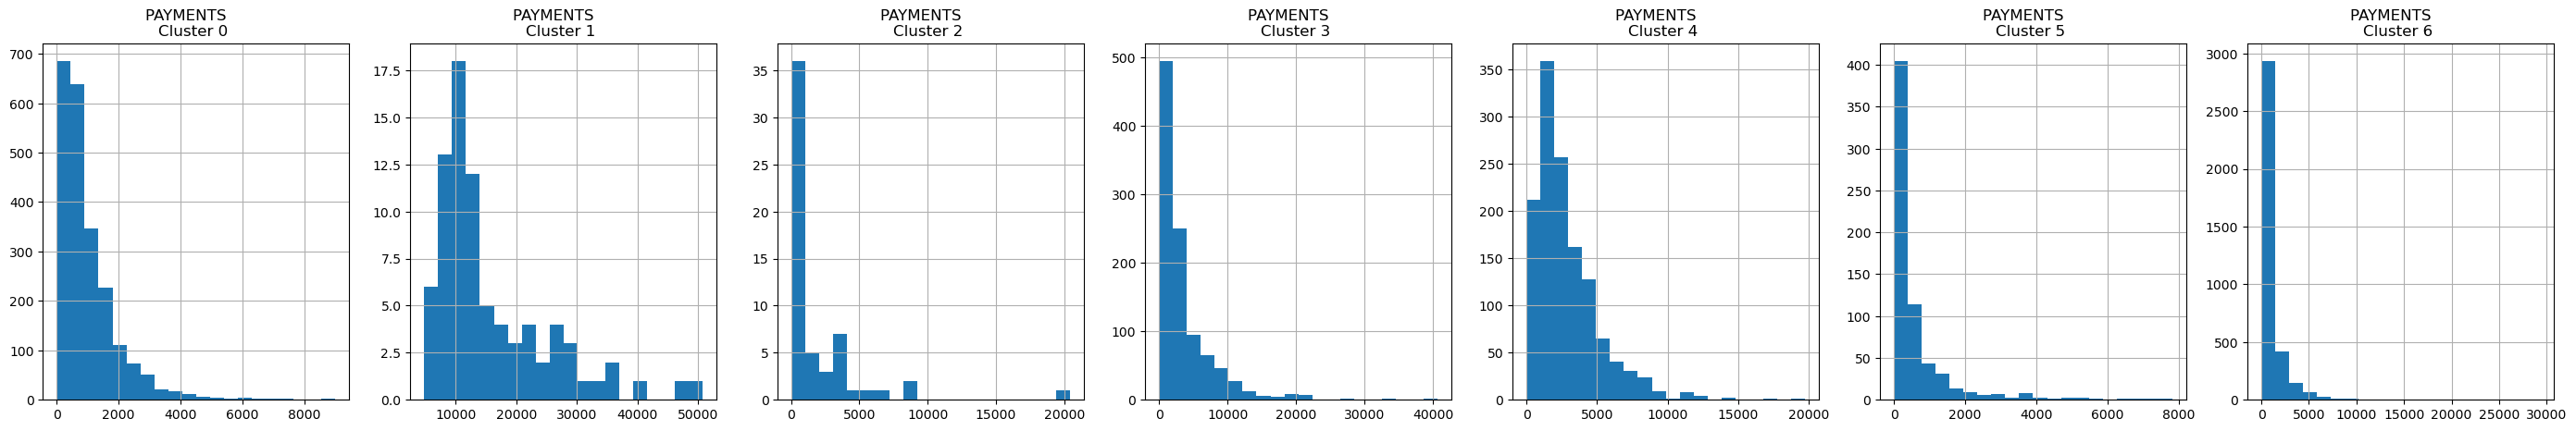

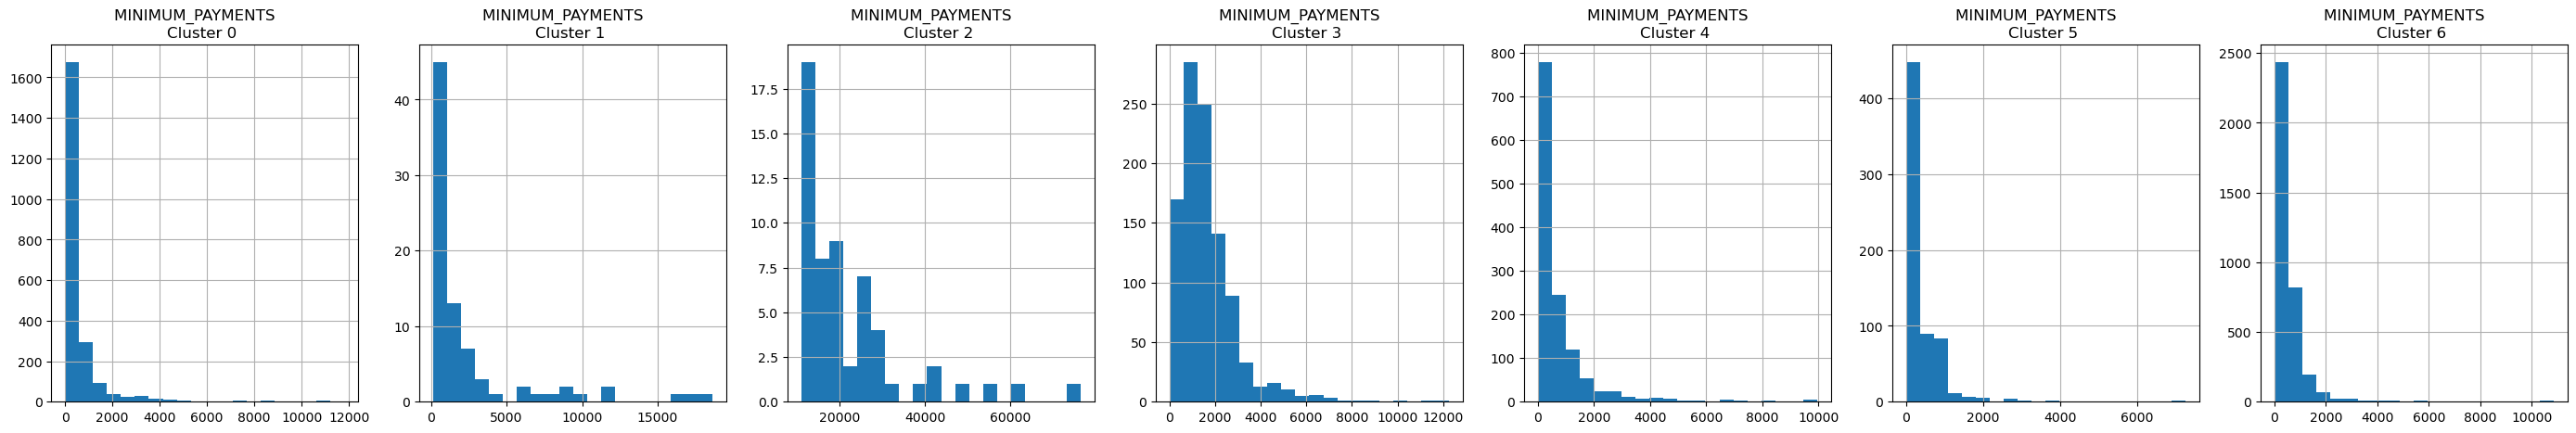

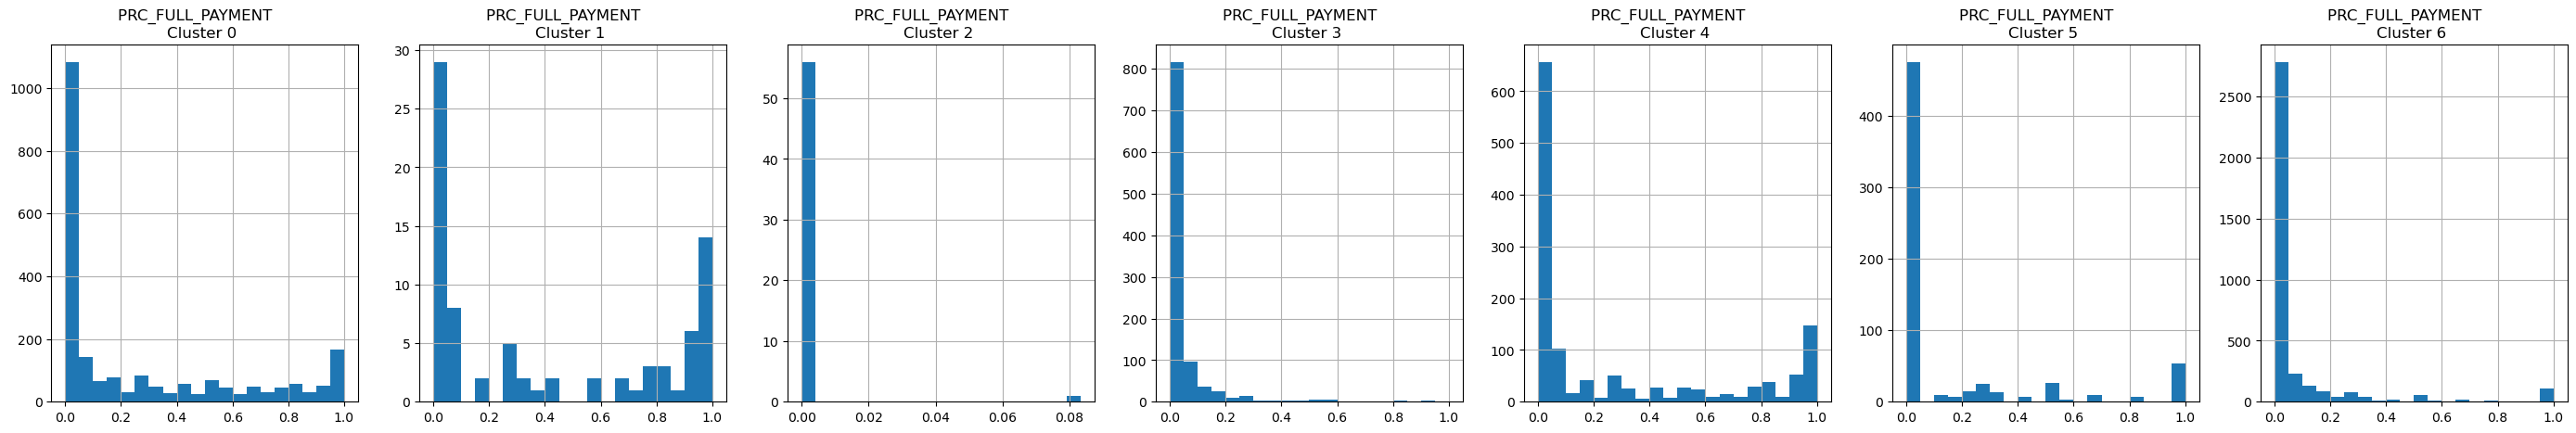

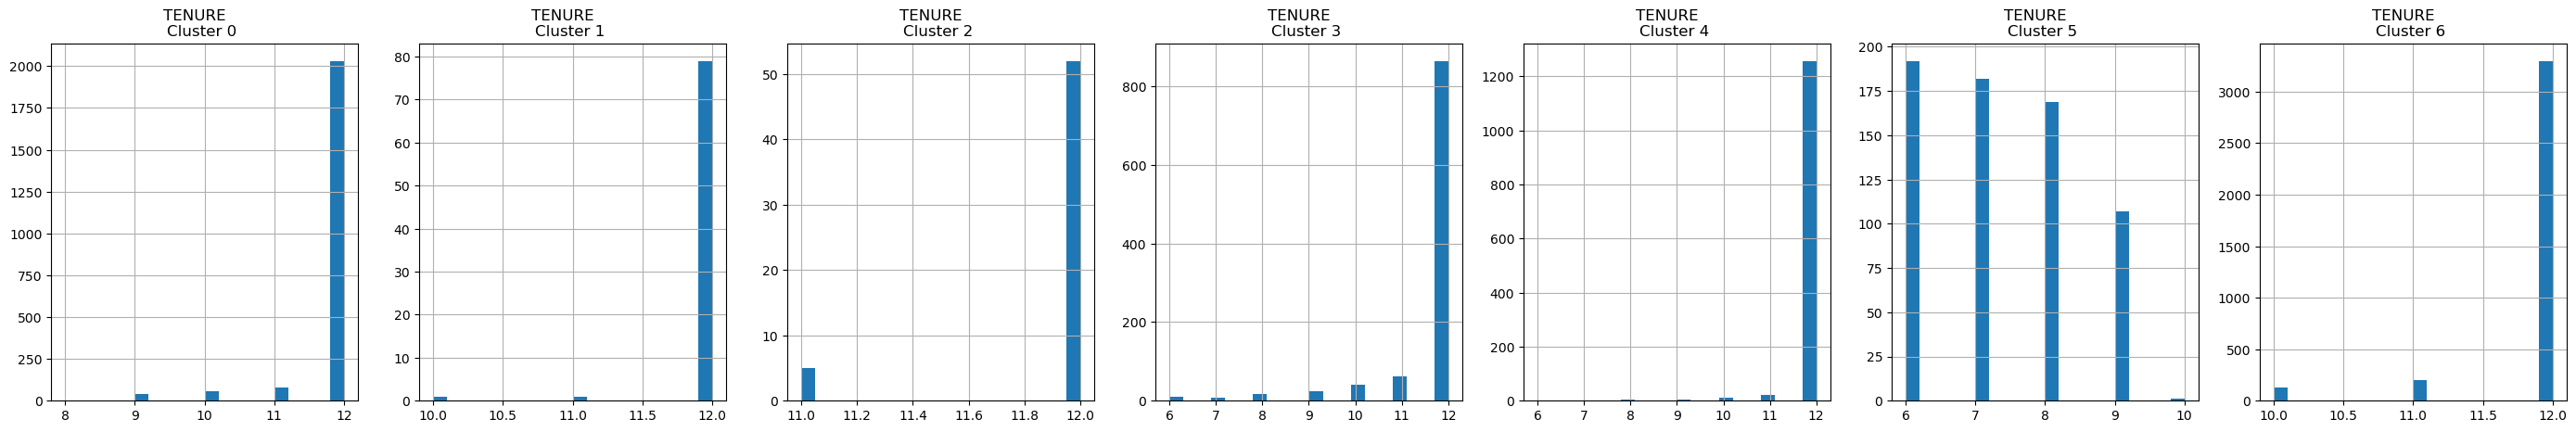

In [36]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()



MINI CHALLENGE #8:
 - Repeat the same procedure with 8 clusters instead of 7


# TASK 8: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

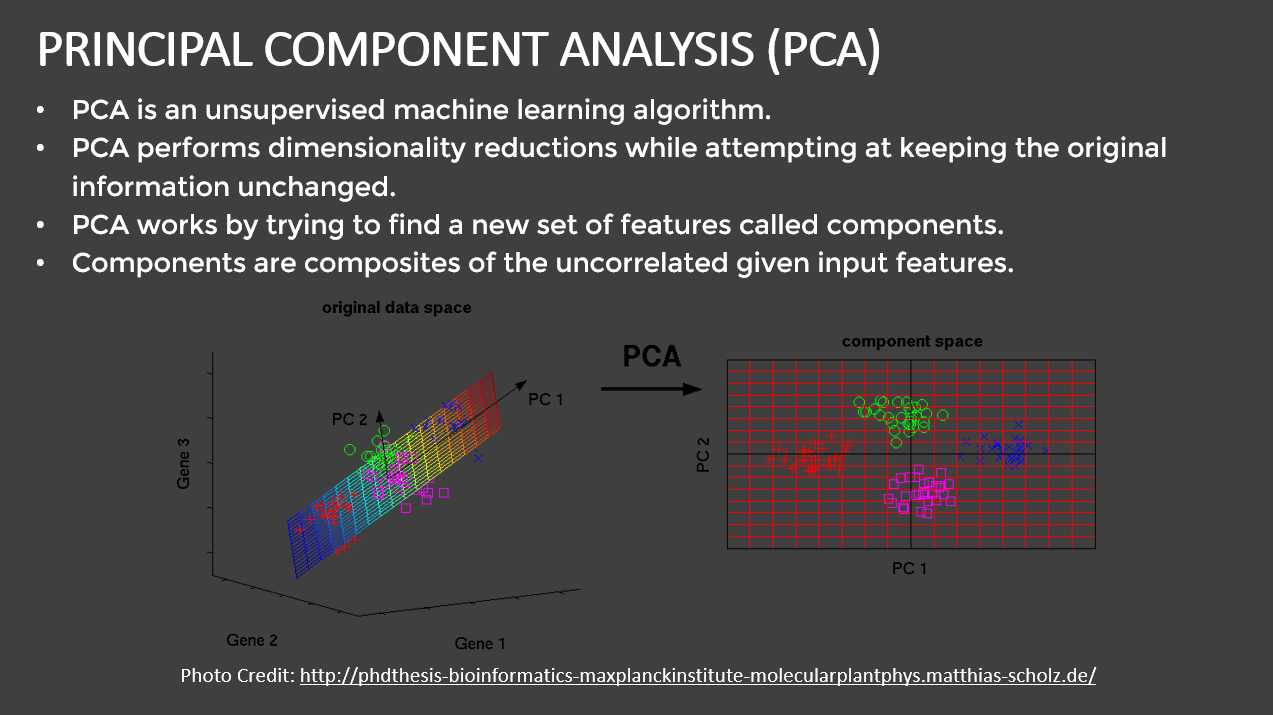

In [37]:
# Obtain the principal components 
pca = PCA(n_components=2) # Get 2 PCA
principal_comp = pca.fit_transform(creditcard_df_scaled) # Transform scaled data into PCA
principal_comp

array([[-1.68222026, -1.07645061],
       [-1.1382949 ,  2.50647666],
       [ 0.96968401, -0.3835203 ],
       ...,
       [-0.92620364, -1.8107856 ],
       [-2.33655167, -0.65796601],
       [-0.55642216, -0.40046712]])

In [38]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -1.682220 -1.076451
1 -1.138295  2.506477
2  0.969684 -0.383520
3 -0.873628  0.043166
4 -1.599434 -0.688581

In [39]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.682220 -1.076451        6
1 -1.138295  2.506477        3
2  0.969684 -0.383520        4
3 -0.873628  0.043166        6
4 -1.599434 -0.688581        6

<positron-console-cell-40>:2: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.


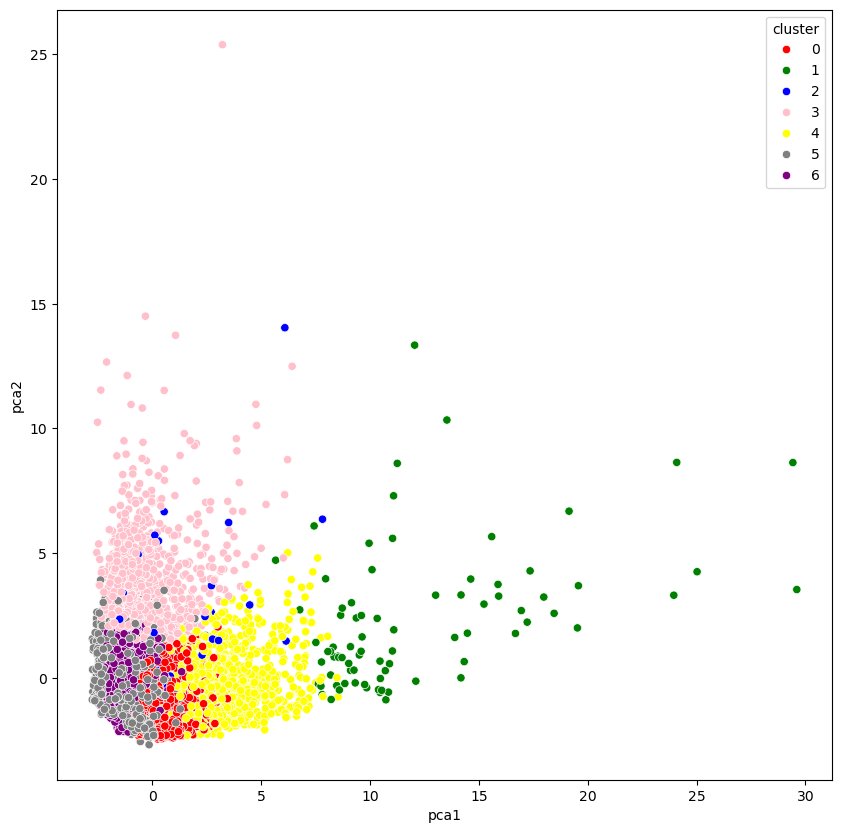

In [40]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

MINI CHALLENGE #9: 
 - Repeat task #7 and #8 with number of clusters = 7 and 4

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS

MINI CHALLENGE SOLUTIONS

MINI CHALLENGE #1

In [ ]:
# Average, minimum and maximum balance amounts
print('The average, minimum and maximum balance amount are:', creditcard_df['BALANCE'].mean(), creditcard_df['BALANCE'].min(), creditcard_df['BALANCE'].max())

MINI CHALLENGE #2

In [ ]:
# Let's see who made one off purchase of $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

In [ ]:
creditcard_df['CASH_ADVANCE'].max()

In [ ]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]


MINI CHALLENGE #3

In [ ]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

MINI CHALLENGE #4

In [ ]:
# Let's drop Customer ID since it has no meaning here 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)
creditcard_df.head()

MINI CHALLENGE #5

In [ ]:
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

MINI CHALLENGE #6: 
- Which of the following conditions could terminate the K-means clustering algorithm? (choose 2)
    - K-means terminates after a fixed number of iterations is reached  (True)
    - K-means terminates when the number of clusters does not increase between iterations (False)
    - K-means terminates when the centroid locations do not change between iterations (True)


MINI CHALLENGE #7: 

In [ ]:
# code modification
kmeans.fit(creditcard_df_scaled[:,:7])
# optimal number of clusters would be = 5

MINI CHALLENGE #8 & #9:
 - simply change the values requested in the question and rerun the cells